In [2]:
import datetime
now = datetime.datetime.now()
print ("Current date and time: ")
print (now.strftime("%Y-%m-%d %H:%M:%S"))

Current date and time: 
2022-07-03 12:01:22


In [3]:
# installing dependencies
#
import pandas as pd
import os
import seaborn as sns
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl
import geopandas as gpd

### Snow Depth

In [4]:
# read in CSV file for each winter
#
snow_depth = pd.read_csv ("D:/Users/aster/Desktop/SNOW_DEPTH_2022_07_01/SnowDepth_WhiteDzud_3hr.csv")
df1 = pd.DataFrame(snow_depth)
df1

,DateTime,Arkhangai,BayanUlgii,Bayankhongor,Bulgan,DarkhanUul,Dornod,Dornogovi,Dundgovi,GoviAltai,...,Khuvsgul,Orkhon,Selenge,Sukhbaatar,Tuv,Ulaanbaatar,Umnugovi,Uvs,Uvurkhangai,Zavkhan
0,2000-01-01 00:00:00,0.020283,0.163833,0.009550,0.096350,0.059797,0.031030,0.009782,0.005413,0.008964,...,0.108549,0.075811,0.090601,0.009469,0.024535,0.020010,0.001197,0.277315,0.013051,0.060852
1,2000-01-01 03:00:00,0.020587,0.166380,0.010599,0.102729,0.059687,0.031119,0.010982,0.006481,0.011329,...,0.108284,0.086285,0.092040,0.009875,0.028300,0.019886,0.001326,0.277718,0.013982,0.061050
2,2000-01-01 06:00:00,0.020758,0.168298,0.010686,0.104631,0.059558,0.031808,0.012226,0.012007,0.011671,...,0.108130,0.087865,0.092201,0.010242,0.032270,0.019819,0.001567,0.278051,0.023664,0.060873
3,2000-01-01 09:00:00,0.020753,0.170367,0.011013,0.104701,0.059515,0.032122,0.013671,0.013168,0.011998,...,0.108207,0.087865,0.092158,0.010644,0.032287,0.019830,0.002670,0.278708,0.024279,0.060922
4,2000-01-01 12:00:00,0.020737,0.172809,0.011085,0.104693,0.059494,0.036289,0.015174,0.014477,0.012026,...,0.108260,0.087876,0.092158,0.011824,0.032314,0.019814,0.003457,0.279360,0.024738,0.060971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62458,2021-05-17 06:00:00,0.007534,0.040299,0.000177,0.003062,0.000195,0.000130,0.000000,0.000000,0.000119,...,0.057832,0.013855,0.003371,0.000000,0.000942,0.000044,0.000000,0.016939,0.000012,0.016802
62459,2021-05-17 09:00:00,0.017269,0.038307,0.000541,0.014380,0.000000,0.000058,0.000000,0.000000,0.000899,...,0.064206,0.040386,0.002866,0.000000,0.000808,0.000009,0.000000,0.014812,0.000000,0.023617
62460,2021-05-17 12:00:00,0.026892,0.037231,0.001034,0.031798,0.000038,0.000045,0.000000,0.000040,0.000511,...,0.069382,0.065363,0.004733,0.000000,0.010807,0.020670,0.000000,0.012470,0.006496,0.024374
62461,2021-05-17 15:00:00,0.030476,0.037139,0.001075,0.033557,0.000043,0.000045,0.000000,0.001244,0.000487,...,0.070322,0.064970,0.005639,0.000000,0.027397,0.040836,0.000000,0.012469,0.010414,0.024310


In [5]:
df1.dtypes

DateTime         object
Arkhangai       float64
BayanUlgii      float64
Bayankhongor    float64
Bulgan          float64
DarkhanUul      float64
Dornod          float64
Dornogovi       float64
Dundgovi        float64
GoviAltai       float64
Govisumber      float64
Khentii         float64
Khovd           float64
Khuvsgul        float64
Orkhon          float64
Selenge         float64
Sukhbaatar      float64
Tuv             float64
Ulaanbaatar     float64
Umnugovi        float64
Uvs             float64
Uvurkhangai     float64
Zavkhan         float64
dtype: object

In [6]:
df1['DateTime'] = pd.to_datetime(df1['DateTime'])

In [7]:
df1.dtypes

DateTime        datetime64[ns]
Arkhangai              float64
BayanUlgii             float64
Bayankhongor           float64
Bulgan                 float64
DarkhanUul             float64
Dornod                 float64
Dornogovi              float64
Dundgovi               float64
GoviAltai              float64
Govisumber             float64
Khentii                float64
Khovd                  float64
Khuvsgul               float64
Orkhon                 float64
Selenge                float64
Sukhbaatar             float64
Tuv                    float64
Ulaanbaatar            float64
Umnugovi               float64
Uvs                    float64
Uvurkhangai            float64
Zavkhan                float64
dtype: object

In [8]:
#Set DateTime as index
#
df1= df1.set_index('DateTime')
df1

,Arkhangai,BayanUlgii,Bayankhongor,Bulgan,DarkhanUul,Dornod,Dornogovi,Dundgovi,GoviAltai,Govisumber,...,Khuvsgul,Orkhon,Selenge,Sukhbaatar,Tuv,Ulaanbaatar,Umnugovi,Uvs,Uvurkhangai,Zavkhan
DateTime,,,,,,,,,,,,,,,,,,,,,
2000-01-01 00:00:00,0.020283,0.163833,0.009550,0.096350,0.059797,0.031030,0.009782,0.005413,0.008964,0.014887,...,0.108549,0.075811,0.090601,0.009469,0.024535,0.020010,0.001197,0.277315,0.013051,0.060852
2000-01-01 03:00:00,0.020587,0.166380,0.010599,0.102729,0.059687,0.031119,0.010982,0.006481,0.011329,0.015827,...,0.108284,0.086285,0.092040,0.009875,0.028300,0.019886,0.001326,0.277718,0.013982,0.061050
2000-01-01 06:00:00,0.020758,0.168298,0.010686,0.104631,0.059558,0.031808,0.012226,0.012007,0.011671,0.016777,...,0.108130,0.087865,0.092201,0.010242,0.032270,0.019819,0.001567,0.278051,0.023664,0.060873
2000-01-01 09:00:00,0.020753,0.170367,0.011013,0.104701,0.059515,0.032122,0.013671,0.013168,0.011998,0.017821,...,0.108207,0.087865,0.092158,0.010644,0.032287,0.019830,0.002670,0.278708,0.024279,0.060922
2000-01-01 12:00:00,0.020737,0.172809,0.011085,0.104693,0.059494,0.036289,0.015174,0.014477,0.012026,0.018887,...,0.108260,0.087876,0.092158,0.011824,0.032314,0.019814,0.003457,0.279360,0.024738,0.060971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-17 06:00:00,0.007534,0.040299,0.000177,0.003062,0.000195,0.000130,0.000000,0.000000,0.000119,0.000000,...,0.057832,0.013855,0.003371,0.000000,0.000942,0.000044,0.000000,0.016939,0.000012,0.016802
2021-05-17 09:00:00,0.017269,0.038307,0.000541,0.014380,0.000000,0.000058,0.000000,0.000000,0.000899,0.000000,...,0.064206,0.040386,0.002866,0.000000,0.000808,0.000009,0.000000,0.014812,0.000000,0.023617
2021-05-17 12:00:00,0.026892,0.037231,0.001034,0.031798,0.000038,0.000045,0.000000,0.000040,0.000511,0.000000,...,0.069382,0.065363,0.004733,0.000000,0.010807,0.020670,0.000000,0.012470,0.006496,0.024374


In [9]:
#Daily mean
day_mean_df1= df1.resample('D').mean()
day_mean_df1

,Arkhangai,BayanUlgii,Bayankhongor,Bulgan,DarkhanUul,Dornod,Dornogovi,Dundgovi,GoviAltai,Govisumber,...,Khuvsgul,Orkhon,Selenge,Sukhbaatar,Tuv,Ulaanbaatar,Umnugovi,Uvs,Uvurkhangai,Zavkhan
DateTime,,,,,,,,,,,,,,,,,,,,,
2000-01-01,0.020611,0.171343,0.010776,0.103279,0.062720,0.040069,1.397477e-02,0.012570,0.011133,0.016864,...,0.108926,0.088989,0.094492,0.012897,0.030600,0.019488,0.003628,0.266873,0.021924,0.060321
2000-01-02,0.030727,0.191508,0.028223,0.109523,0.084351,0.055303,1.732546e-02,0.023521,0.014121,0.009654,...,0.121186,0.115994,0.112353,0.025288,0.032705,0.016872,0.029170,0.200500,0.045558,0.066114
2000-01-03,0.045717,0.193032,0.043282,0.113867,0.083901,0.054838,2.394886e-02,0.029742,0.022189,0.013129,...,0.133872,0.119640,0.112032,0.026326,0.034977,0.017046,0.036531,0.202629,0.056343,0.071932
2000-01-04,0.045875,0.192110,0.047988,0.113236,0.083278,0.054102,2.624052e-02,0.031184,0.037933,0.015300,...,0.139565,0.118564,0.111525,0.026049,0.035337,0.017188,0.033163,0.201805,0.054347,0.071808
2000-01-05,0.045762,0.194991,0.168559,0.112225,0.082492,0.057085,2.549751e-02,0.032030,0.385476,0.015166,...,0.139371,0.117462,0.110785,0.025639,0.034959,0.017028,0.034300,0.201263,0.053271,0.073808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-13,0.021697,0.079608,0.003475,0.002255,0.000890,0.012453,6.294804e-08,0.000000,0.000184,0.000000,...,0.104556,0.001353,0.007702,0.000159,0.002725,0.000811,0.000000,0.066373,0.000482,0.045371
2021-05-14,0.015018,0.052796,0.002287,0.001619,0.000629,0.006546,0.000000e+00,0.000000,0.000025,0.000000,...,0.080753,0.000503,0.005938,0.000091,0.002146,0.000696,0.000000,0.045373,0.000236,0.027185
2021-05-15,0.007749,0.035828,0.001027,0.000629,0.000233,0.001597,0.000000e+00,0.000000,0.000000,0.000000,...,0.054354,0.000074,0.002749,0.000002,0.001073,0.000294,0.000000,0.029511,0.000036,0.012560


In [10]:
#Divide into 'winters' e.g. Jul 2019-June 2020
#
day_mean_W00_01_df1 = day_mean_df1.loc['07-2019' : '06-2020']
day_mean_W00_01_df1

,Arkhangai,BayanUlgii,Bayankhongor,Bulgan,DarkhanUul,Dornod,Dornogovi,Dundgovi,GoviAltai,Govisumber,...,Khuvsgul,Orkhon,Selenge,Sukhbaatar,Tuv,Ulaanbaatar,Umnugovi,Uvs,Uvurkhangai,Zavkhan
DateTime,,,,,,,,,,,,,,,,,,,,,
2019-07-01,0.083082,0.101094,0.023906,0.117077,0.170544,0.079213,0.006891,1.172452e-02,0.029684,0.021874,...,0.163995,0.162906,0.190667,0.044071,0.081574,0.095874,8.608094e-04,0.112356,0.025413,0.117278
2019-07-02,0.080937,0.104051,0.022469,0.114808,0.168098,0.077604,0.006434,1.102392e-02,0.027339,0.020815,...,0.160889,0.160055,0.187508,0.042253,0.079457,0.093221,7.063764e-04,0.110850,0.024152,0.114536
2019-07-03,0.069682,0.145769,0.018393,0.131045,0.212110,0.076214,0.009008,9.689878e-03,0.022314,0.023255,...,0.164474,0.182237,0.196591,0.046659,0.077823,0.096061,8.206958e-04,0.173917,0.021193,0.126721
2019-07-04,0.058670,0.173364,0.014720,0.146638,0.255428,0.074827,0.011249,8.264457e-03,0.018042,0.025639,...,0.167897,0.204149,0.205704,0.050648,0.076159,0.098976,8.628066e-04,0.234740,0.017947,0.138993
2019-07-05,0.056844,0.169487,0.013992,0.143793,0.251662,0.072627,0.010492,7.539008e-03,0.017026,0.024155,...,0.165541,0.201432,0.202581,0.048872,0.074302,0.097133,1.241179e-03,0.230539,0.016771,0.136628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-26,0.012050,0.187487,0.002643,0.010976,0.025959,0.013259,0.000246,5.385441e-04,0.000770,0.001251,...,0.085063,0.009888,0.031025,0.000863,0.006424,0.015273,0.000000e+00,0.123463,0.001116,0.037490
2020-06-27,0.007257,0.166923,0.001575,0.008525,0.017337,0.007565,0.000010,8.242740e-06,0.000315,0.000013,...,0.077035,0.006506,0.022187,0.000099,0.002819,0.009012,6.687063e-07,0.120179,0.000034,0.032472
2020-06-28,0.004374,0.148405,0.000928,0.006149,0.012712,0.003232,0.000006,0.000000e+00,0.000179,0.000029,...,0.068428,0.004388,0.015967,0.000339,0.001895,0.004752,0.000000e+00,0.114468,0.000026,0.028052


In [11]:
run_mean_28_df1 = day_mean_W00_01_df1.rolling(28, center=True).mean()
run_mean_28_df1

,Arkhangai,BayanUlgii,Bayankhongor,Bulgan,DarkhanUul,Dornod,Dornogovi,Dundgovi,GoviAltai,Govisumber,...,Khuvsgul,Orkhon,Selenge,Sukhbaatar,Tuv,Ulaanbaatar,Umnugovi,Uvs,Uvurkhangai,Zavkhan
DateTime,,,,,,,,,,,,,,,,,,,,,
2019-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='DateTime'>

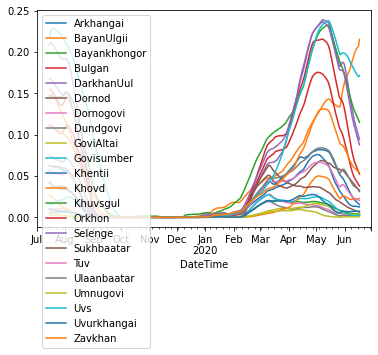

In [12]:
run_mean_28_df1.plot()

## Air Temperature

In [13]:
# read in CSV file for each winter
#
air_temp = pd.read_csv ("C:/Users/aster/OneDrive/Desktop/Air_Temperature/AirTemp_ColdDzud_C_DailyMean.csv")
df2 = pd.DataFrame(air_temp)
df2

,DateTime,Arkhangai,BayanUlgii,Bayankhongor,Bulgan,DarkhanUul,Dornod,Dornogovi,Dundgovi,GoviAltai,...,Khuvsgul,Orkhon,Selenge,Sukhbaatar,Tuv,Ulaanbaatar,Umnugovi,Uvs,Uvurkhangai,Zavkhan
0,2000-01-01,-26.562494,-23.213774,-21.401563,-26.393775,-28.562550,-20.851677,-17.600990,-23.814320,-18.266523,...,-30.352986,-27.313359,-28.587479,-19.218162,-30.078575,-33.850558,-16.577842,-21.116288,-23.789344,-23.056585
1,2000-01-02,-22.856294,-21.700020,-14.846437,-26.826066,-25.640006,-28.079723,-22.615728,-25.474733,-12.212307,...,-25.233630,-28.325338,-26.433683,-28.574628,-27.857652,-28.214586,-11.784267,-18.096907,-19.235685,-18.864553
2,2000-01-03,-24.710436,-32.679842,-21.216367,-25.053685,-28.642681,-33.833305,-19.060248,-22.418509,-20.948301,...,-24.880678,-27.366058,-29.360227,-24.617702,-29.485871,-32.484099,-12.966847,-24.625272,-21.167229,-23.997698
3,2000-01-04,-33.548715,-38.925256,-28.606410,-28.662144,-30.288323,-29.457310,-21.167293,-25.555954,-30.229354,...,-32.156436,-29.664533,-30.086647,-24.334877,-28.555619,-29.821684,-19.337397,-35.680408,-27.623462,-36.766738
4,2000-01-05,-37.187563,-29.595323,-35.287520,-31.449171,-32.867309,-28.626646,-28.064774,-32.569686,-34.865015,...,-36.436839,-32.225105,-32.652804,-29.189361,-33.959773,-34.926976,-29.987616,-29.938650,-34.333414,-37.212091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7983,2021-11-09,-18.232010,-20.604370,-16.617636,-18.703357,-19.629943,-17.207103,-11.602643,-12.908264,-14.853633,...,-21.748980,-16.944034,-19.697497,-15.608058,-15.839430,-17.250067,-13.107333,-21.879954,-15.202451,-20.646744
7984,2021-11-10,-18.759950,-18.612785,-16.193951,-18.418275,-19.170675,-17.463098,-11.179114,-13.269970,-14.441664,...,-21.406628,-16.867078,-18.473760,-15.227246,-17.163777,-18.417110,-12.812350,-21.491120,-15.787442,-20.934618
7985,2021-11-11,-17.824713,-20.206600,-15.073458,-17.414838,-17.993425,-18.366551,-11.787831,-12.188342,-13.371680,...,-20.533697,-15.721321,-18.142362,-17.405144,-17.288269,-19.219315,-12.354629,-21.479615,-15.270492,-20.376347
7986,2021-11-12,-16.198717,-18.947347,-13.680001,-17.536234,-17.977536,-19.217680,-11.214207,-11.943136,-12.059568,...,-20.017051,-16.379550,-18.026901,-17.505467,-16.652109,-18.993199,-11.091640,-21.688793,-13.793215,-18.849905


In [14]:
df2.dtypes

DateTime         object
Arkhangai       float64
BayanUlgii      float64
Bayankhongor    float64
Bulgan          float64
DarkhanUul      float64
Dornod          float64
Dornogovi       float64
Dundgovi        float64
GoviAltai       float64
Govisumber      float64
Khentii         float64
Khovd           float64
Khuvsgul        float64
Orkhon          float64
Selenge         float64
Sukhbaatar      float64
Tuv             float64
Ulaanbaatar     float64
Umnugovi        float64
Uvs             float64
Uvurkhangai     float64
Zavkhan         float64
dtype: object

In [15]:
df2['DateTime'] = pd.to_datetime(df2['DateTime'])

In [16]:
df2.dtypes

DateTime        datetime64[ns]
Arkhangai              float64
BayanUlgii             float64
Bayankhongor           float64
Bulgan                 float64
DarkhanUul             float64
Dornod                 float64
Dornogovi              float64
Dundgovi               float64
GoviAltai              float64
Govisumber             float64
Khentii                float64
Khovd                  float64
Khuvsgul               float64
Orkhon                 float64
Selenge                float64
Sukhbaatar             float64
Tuv                    float64
Ulaanbaatar            float64
Umnugovi               float64
Uvs                    float64
Uvurkhangai            float64
Zavkhan                float64
dtype: object

In [17]:
#Set DateTime as index
#
df2= df2.set_index('DateTime')
df2

,Arkhangai,BayanUlgii,Bayankhongor,Bulgan,DarkhanUul,Dornod,Dornogovi,Dundgovi,GoviAltai,Govisumber,...,Khuvsgul,Orkhon,Selenge,Sukhbaatar,Tuv,Ulaanbaatar,Umnugovi,Uvs,Uvurkhangai,Zavkhan
DateTime,,,,,,,,,,,,,,,,,,,,,
2000-01-01,-26.562494,-23.213774,-21.401563,-26.393775,-28.562550,-20.851677,-17.600990,-23.814320,-18.266523,-25.308578,...,-30.352986,-27.313359,-28.587479,-19.218162,-30.078575,-33.850558,-16.577842,-21.116288,-23.789344,-23.056585
2000-01-02,-22.856294,-21.700020,-14.846437,-26.826066,-25.640006,-28.079723,-22.615728,-25.474733,-12.212307,-28.942335,...,-25.233630,-28.325338,-26.433683,-28.574628,-27.857652,-28.214586,-11.784267,-18.096907,-19.235685,-18.864553
2000-01-03,-24.710436,-32.679842,-21.216367,-25.053685,-28.642681,-33.833305,-19.060248,-22.418509,-20.948301,-26.989853,...,-24.880678,-27.366058,-29.360227,-24.617702,-29.485871,-32.484099,-12.966847,-24.625272,-21.167229,-23.997698
2000-01-04,-33.548715,-38.925256,-28.606410,-28.662144,-30.288323,-29.457310,-21.167293,-25.555954,-30.229354,-25.878279,...,-32.156436,-29.664533,-30.086647,-24.334877,-28.555619,-29.821684,-19.337397,-35.680408,-27.623462,-36.766738
2000-01-05,-37.187563,-29.595323,-35.287520,-31.449171,-32.867309,-28.626646,-28.064774,-32.569686,-34.865015,-30.675358,...,-36.436839,-32.225105,-32.652804,-29.189361,-33.959773,-34.926976,-29.987616,-29.938650,-34.333414,-37.212091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-09,-18.232010,-20.604370,-16.617636,-18.703357,-19.629943,-17.207103,-11.602643,-12.908264,-14.853633,-14.794853,...,-21.748980,-16.944034,-19.697497,-15.608058,-15.839430,-17.250067,-13.107333,-21.879954,-15.202451,-20.646744
2021-11-10,-18.759950,-18.612785,-16.193951,-18.418275,-19.170675,-17.463098,-11.179114,-13.269970,-14.441664,-15.762198,...,-21.406628,-16.867078,-18.473760,-15.227246,-17.163777,-18.417110,-12.812350,-21.491120,-15.787442,-20.934618
2021-11-11,-17.824713,-20.206600,-15.073458,-17.414838,-17.993425,-18.366551,-11.787831,-12.188342,-13.371680,-14.703645,...,-20.533697,-15.721321,-18.142362,-17.405144,-17.288269,-19.219315,-12.354629,-21.479615,-15.270492,-20.376347


In [18]:
#Divide into 'winters' e.g. Jul 2019-Jun 2020
#
day_mean_W00_01_df2 = df2.loc['07-2019' : '06-2020']
day_mean_W00_01_df2

,Arkhangai,BayanUlgii,Bayankhongor,Bulgan,DarkhanUul,Dornod,Dornogovi,Dundgovi,GoviAltai,Govisumber,...,Khuvsgul,Orkhon,Selenge,Sukhbaatar,Tuv,Ulaanbaatar,Umnugovi,Uvs,Uvurkhangai,Zavkhan
DateTime,,,,,,,,,,,,,,,,,,,,,
2019-07-01,8.866164,14.642979,18.250717,10.232322,12.016313,15.228390,18.265087,15.130799,23.251912,12.764129,...,8.658076,10.375518,11.728868,14.141035,10.100493,9.079788,20.736634,18.453445,12.992604,14.465775
2019-07-02,11.314680,11.926422,17.403314,12.490981,13.813801,14.912141,18.293219,16.009091,21.364517,13.854005,...,11.366742,12.260322,13.121142,14.373462,11.350804,10.226811,19.467124,16.849238,14.494257,15.333717
2019-07-03,12.541221,10.650642,20.385096,13.867553,13.855206,15.408506,20.925347,19.425292,21.972233,15.404154,...,10.794448,13.806937,13.253421,15.242690,13.046090,11.512341,24.015820,15.521226,18.463242,13.756117
2019-07-04,10.669757,7.144729,20.896766,12.922701,13.864934,16.959214,22.839212,18.982412,21.255635,16.117429,...,9.355529,12.835222,13.232070,17.385189,12.880166,11.620130,25.461348,12.634040,17.037268,12.569225
2019-07-05,10.002063,7.578704,17.691309,11.833094,12.884964,16.520976,21.918173,18.047461,16.704925,14.229115,...,7.791140,11.810410,11.958896,16.657108,12.344188,10.842592,22.861449,13.287337,16.984884,9.947058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-26,11.706520,10.679047,18.825874,14.700106,16.870699,17.473804,23.786183,20.789476,20.567274,18.291493,...,10.955657,15.156637,16.075493,18.263242,15.324410,13.875326,22.858024,16.978375,17.844237,14.044450
2020-06-27,11.976642,10.986784,18.859108,14.737019,17.332278,18.405669,18.563711,15.853333,20.928839,14.930508,...,11.884171,15.019524,16.412219,16.819311,14.103122,12.948825,19.582502,17.668427,16.464582,14.273816
2020-06-28,12.372198,10.237555,19.642545,15.383428,17.324467,16.603593,19.748717,19.173769,21.190292,16.129714,...,12.798474,15.586432,16.494412,15.314433,14.748340,13.363903,23.494872,17.380949,17.559595,13.851183


In [19]:
run_mean_28_df2 = day_mean_W00_01_df2.rolling(28, center=True).mean()
run_mean_28_df2

,Arkhangai,BayanUlgii,Bayankhongor,Bulgan,DarkhanUul,Dornod,Dornogovi,Dundgovi,GoviAltai,Govisumber,...,Khuvsgul,Orkhon,Selenge,Sukhbaatar,Tuv,Ulaanbaatar,Umnugovi,Uvs,Uvurkhangai,Zavkhan
DateTime,,,,,,,,,,,,,,,,,,,,,
2019-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='DateTime'>

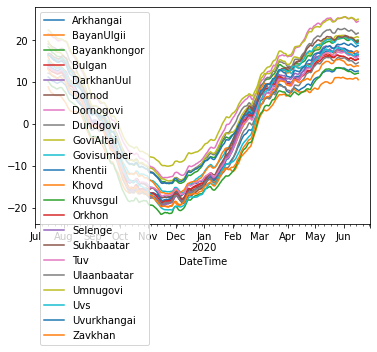

In [20]:
run_mean_28_df2.plot()

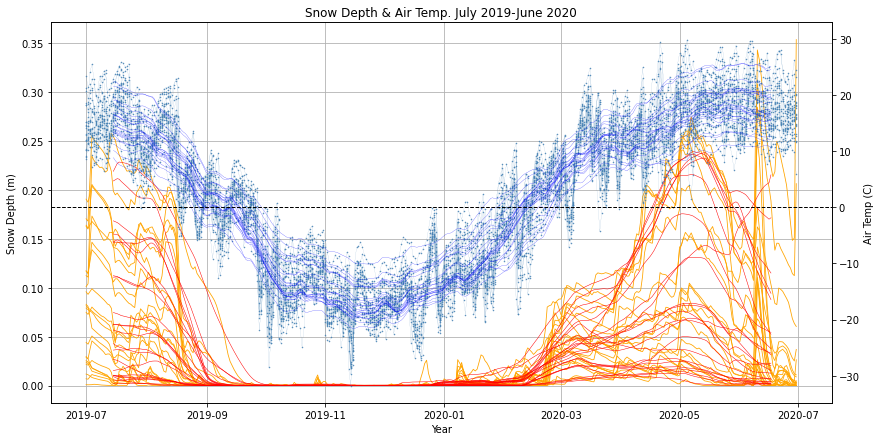

In [21]:
#define subplots
fig, ax = plt.subplots(figsize=(14,7))

#add snow depth to plot
ax.plot(day_mean_W00_01_df1, label='Snow Depth', color='orange', linewidth=0.8)
ax.plot(run_mean_28_df1, label='Snow Depth 28-day running mean', color='red', linewidth=0.5)

#define second y-axis that shares x-axis with current plot
ax2 = ax.twinx()
#add ais temp to plot
ax2.plot(day_mean_W00_01_df2, label='Air Temp', color='steelblue', linewidth=0.1, marker='o', markersize=0.5)
ax2.plot(run_mean_28_df2, label='Air Temp 28-day running mean', color='blue', linewidth=0.20)
#add second y-axis label
ax2.set_ylabel('Air Temp (C)')
#add line at 0 C
ax2.axhline(0, linestyle = 'dashed', c='black', linewidth = 1)

# add title & grid
ax.set(title='Snow Depth & Air Temp. July 2019-June 2020', xlabel='Year', ylabel='Snow Depth (m)')
ax.grid()

---

### Find cold snaps= difference of at least 5 degrees between the daily mean and the 28-day running mean for at least 5 consecutive days.

In [22]:
diff_day_running = day_mean_W00_01_df2.abs() - run_mean_28_df2.abs()
diff_day_running.head(80)

,Arkhangai,BayanUlgii,Bayankhongor,Bulgan,DarkhanUul,Dornod,Dornogovi,Dundgovi,GoviAltai,Govisumber,...,Khuvsgul,Orkhon,Selenge,Sukhbaatar,Tuv,Ulaanbaatar,Umnugovi,Uvs,Uvurkhangai,Zavkhan
DateTime,,,,,,,,,,,,,,,,,,,,,
2019-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-14,-1.721104,-0.019139,1.901264,1.140154,1.907063,0.044344,1.719996,2.827443,1.488355,2.419794,...,-1.892837,1.483538,1.542840,0.453395,2.123940,-1.012748,1.876066,1.464943,2.785518,-0.933993
2019-09-15,-0.222393,-3.884947,3.172480,2.894668,4.065823,3.862578,3.639808,4.873290,2.916389,5.155110,...,-4.294437,3.198810,2.968729,3.898108,3.610181,0.103882,2.514241,2.229610,4.332396,-2.280308
2019-09-16,-1.203500,-4.409304,3.803222,0.427308,0.706222,0.357680,3.711453,4.787674,3.556971,4.459725,...,-4.190201,-0.715728,-0.331495,2.517024,1.790383,-1.005592,3.742512,1.386908,4.107418,-2.499522


In [23]:
diff_day_running.tail(80)

,Arkhangai,BayanUlgii,Bayankhongor,Bulgan,DarkhanUul,Dornod,Dornogovi,Dundgovi,GoviAltai,Govisumber,...,Khuvsgul,Orkhon,Selenge,Sukhbaatar,Tuv,Ulaanbaatar,Umnugovi,Uvs,Uvurkhangai,Zavkhan
DateTime,,,,,,,,,,,,,,,,,,,,,
2020-04-12,-4.887541,-6.858654,0.520649,-7.327169,-6.208196,3.441195,6.606474,4.036674,-4.682801,6.502159,...,-6.361611,-7.207747,-5.591428,6.468558,-0.822957,0.516496,4.397459,-7.199653,0.883402,-6.853862
2020-04-13,-7.904977,-3.795010,-7.173858,-6.578372,-5.671558,2.156787,1.810628,-6.772291,-7.802752,-4.321431,...,-5.628977,-6.632335,-5.730918,4.276028,-7.324276,-7.220962,-3.538592,-5.741060,-8.625234,-7.311548
2020-04-14,-5.462135,-0.357208,-6.336149,-5.057231,-4.217942,-2.060723,-5.582071,-7.366024,-4.124239,-6.699247,...,-3.925979,-5.065083,-4.497812,-2.094149,-6.257070,-6.155033,-6.982625,-2.460680,-6.814412,-4.284329
2020-04-15,-2.185239,0.174379,-1.665572,-0.703279,-0.794359,-3.262433,-2.768311,-1.433507,-0.918258,-3.109901,...,-2.699250,-0.675095,-0.861430,-3.612786,-1.699319,-2.138436,-1.390880,-0.864887,-1.168779,-2.828039
2020-04-16,0.229689,2.661346,0.186312,0.952654,1.187082,-1.436702,0.882838,0.912496,1.446981,0.760937,...,-1.389569,1.031520,0.938099,-0.304086,1.216524,0.966127,-0.383446,2.177714,0.056549,0.745379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
five_degrees = diff_day_running[diff_day_running >= 5]
five_degrees

,Arkhangai,BayanUlgii,Bayankhongor,Bulgan,DarkhanUul,Dornod,Dornogovi,Dundgovi,GoviAltai,Govisumber,...,Khuvsgul,Orkhon,Selenge,Sukhbaatar,Tuv,Ulaanbaatar,Umnugovi,Uvs,Uvurkhangai,Zavkhan
DateTime,,,,,,,,,,,,,,,,,,,,,
2019-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
#Drop rows which contain NaN 

five_degrees = five_degrees.dropna(axis=0, how='all')
five_degrees

,Arkhangai,BayanUlgii,Bayankhongor,Bulgan,DarkhanUul,Dornod,Dornogovi,Dundgovi,GoviAltai,Govisumber,...,Khuvsgul,Orkhon,Selenge,Sukhbaatar,Tuv,Ulaanbaatar,Umnugovi,Uvs,Uvurkhangai,Zavkhan
DateTime,,,,,,,,,,,,,,,,,,,,,
2019-07-16,NaN,5.316891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.327910,NaN,NaN,NaN,NaN,NaN,NaN,6.313889,NaN,5.561877
2019-07-18,5.08550,NaN,NaN,5.385348,6.370075,NaN,NaN,NaN,5.036039,5.276738,...,5.531631,5.886767,6.159487,NaN,5.755540,5.698114,NaN,5.790708,5.109813,6.034091
2019-07-19,5.03422,NaN,NaN,NaN,NaN,NaN,NaN,5.914124,5.121639,6.416981,...,NaN,NaN,NaN,5.425244,6.048105,5.958872,NaN,NaN,5.531628,5.662845
2019-07-20,5.21334,NaN,NaN,NaN,5.886307,6.465202,NaN,5.206350,NaN,6.235448,...,NaN,NaN,5.799818,6.934196,6.658067,6.658905,NaN,NaN,5.171728,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-05,NaN,NaN,NaN,NaN,NaN,NaN,5.785373,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.671553,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-06,NaN,NaN,NaN,NaN,6.658399,NaN,NaN,5.535329,NaN,5.530869,...,NaN,NaN,5.814949,NaN,6.038960,5.320899,NaN,NaN,NaN,NaN


In [26]:
five_degrees.head(50)

,Arkhangai,BayanUlgii,Bayankhongor,Bulgan,DarkhanUul,Dornod,Dornogovi,Dundgovi,GoviAltai,Govisumber,...,Khuvsgul,Orkhon,Selenge,Sukhbaatar,Tuv,Ulaanbaatar,Umnugovi,Uvs,Uvurkhangai,Zavkhan
DateTime,,,,,,,,,,,,,,,,,,,,,
2019-07-16,NaN,5.316891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.327910,NaN,NaN,NaN,NaN,NaN,NaN,6.313889,NaN,5.561877
2019-07-18,5.085500,NaN,NaN,5.385348,6.370075,NaN,NaN,NaN,5.036039,5.276738,...,5.531631,5.886767,6.159487,NaN,5.755540,5.698114,NaN,5.790708,5.109813,6.034091
2019-07-19,5.034220,NaN,NaN,NaN,NaN,NaN,NaN,5.914124,5.121639,6.416981,...,NaN,NaN,NaN,5.425244,6.048105,5.958872,NaN,NaN,5.531628,5.662845
2019-07-20,5.213340,NaN,NaN,NaN,5.886307,6.465202,NaN,5.206350,NaN,6.235448,...,NaN,NaN,5.799818,6.934196,6.658067,6.658905,NaN,NaN,5.171728,NaN
2019-07-21,NaN,NaN,NaN,NaN,NaN,7.424418,NaN,NaN,NaN,5.144158,...,NaN,NaN,NaN,7.105513,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.937760,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-23,NaN,NaN,NaN,NaN,NaN,5.107762,5.172170,NaN,NaN,NaN,...,NaN,NaN,NaN,6.834194,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.404402,NaN,NaN,NaN,NaN,NaN,NaN,5.418781,NaN,NaN


In [27]:
#save result table as CSV 
five_degrees.to_csv('five_degrees_W19_20.csv')
print('new csv file from list was created... ')

new csv file from list was created... 


In [28]:
#read in five_degrees_W19_20.csv
#
cold_days_user = pd.read_csv('five_degrees_W19_20.csv')
df = pd.DataFrame(cold_days_user)
df

,DateTime,Arkhangai,BayanUlgii,Bayankhongor,Bulgan,DarkhanUul,Dornod,Dornogovi,Dundgovi,GoviAltai,...,Khuvsgul,Orkhon,Selenge,Sukhbaatar,Tuv,Ulaanbaatar,Umnugovi,Uvs,Uvurkhangai,Zavkhan
0,2019-07-16,NaN,5.316891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-07-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.327910,NaN,NaN,NaN,NaN,NaN,NaN,6.313889,NaN,5.561877
2,2019-07-18,5.08550,NaN,NaN,5.385348,6.370075,NaN,NaN,NaN,5.036039,...,5.531631,5.886767,6.159487,NaN,5.755540,5.698114,NaN,5.790708,5.109813,6.034091
3,2019-07-19,5.03422,NaN,NaN,NaN,NaN,NaN,NaN,5.914124,5.121639,...,NaN,NaN,NaN,5.425244,6.048105,5.958872,NaN,NaN,5.531628,5.662845
4,2019-07-20,5.21334,NaN,NaN,NaN,5.886307,6.465202,NaN,5.206350,NaN,...,NaN,NaN,5.799818,6.934196,6.658067,6.658905,NaN,NaN,5.171728,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,2020-05-05,NaN,NaN,NaN,NaN,NaN,NaN,5.785373,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,2020-05-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,2020-06-06,NaN,NaN,NaN,NaN,6.658399,NaN,NaN,5.535329,NaN,...,NaN,NaN,5.814949,NaN,6.038960,5.320899,NaN,NaN,NaN,NaN
110,2020-06-07,NaN,NaN,NaN,NaN,NaN,5.254589,NaN,5.330309,NaN,...,NaN,NaN,NaN,5.894954,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
#Turn to datetime
df['DateTime'] = pd.to_datetime(df['DateTime'])
df.dtypes

DateTime        datetime64[ns]
Arkhangai              float64
BayanUlgii             float64
Bayankhongor           float64
Bulgan                 float64
DarkhanUul             float64
Dornod                 float64
Dornogovi              float64
Dundgovi               float64
GoviAltai              float64
Govisumber             float64
Khentii                float64
Khovd                  float64
Khuvsgul               float64
Orkhon                 float64
Selenge                float64
Sukhbaatar             float64
Tuv                    float64
Ulaanbaatar            float64
Umnugovi               float64
Uvs                    float64
Uvurkhangai            float64
Zavkhan                float64
dtype: object

#### Make a Day column to find x consecutive days

In [30]:
df['Day'] = df['DateTime'].dt.day
df

,DateTime,Arkhangai,BayanUlgii,Bayankhongor,Bulgan,DarkhanUul,Dornod,Dornogovi,Dundgovi,GoviAltai,...,Orkhon,Selenge,Sukhbaatar,Tuv,Ulaanbaatar,Umnugovi,Uvs,Uvurkhangai,Zavkhan,Day
0,2019-07-16,NaN,5.316891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16
1,2019-07-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6.313889,NaN,5.561877,17
2,2019-07-18,5.08550,NaN,NaN,5.385348,6.370075,NaN,NaN,NaN,5.036039,...,5.886767,6.159487,NaN,5.755540,5.698114,NaN,5.790708,5.109813,6.034091,18
3,2019-07-19,5.03422,NaN,NaN,NaN,NaN,NaN,NaN,5.914124,5.121639,...,NaN,NaN,5.425244,6.048105,5.958872,NaN,NaN,5.531628,5.662845,19
4,2019-07-20,5.21334,NaN,NaN,NaN,5.886307,6.465202,NaN,5.206350,NaN,...,NaN,5.799818,6.934196,6.658067,6.658905,NaN,NaN,5.171728,NaN,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,2020-05-05,NaN,NaN,NaN,NaN,NaN,NaN,5.785373,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
108,2020-05-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23
109,2020-06-06,NaN,NaN,NaN,NaN,6.658399,NaN,NaN,5.535329,NaN,...,NaN,5.814949,NaN,6.038960,5.320899,NaN,NaN,NaN,NaN,6
110,2020-06-07,NaN,NaN,NaN,NaN,NaN,5.254589,NaN,5.330309,NaN,...,NaN,NaN,5.894954,NaN,NaN,NaN,NaN,NaN,NaN,7


In [31]:
df.head(90)

,DateTime,Arkhangai,BayanUlgii,Bayankhongor,Bulgan,DarkhanUul,Dornod,Dornogovi,Dundgovi,GoviAltai,...,Orkhon,Selenge,Sukhbaatar,Tuv,Ulaanbaatar,Umnugovi,Uvs,Uvurkhangai,Zavkhan,Day
0,2019-07-16,NaN,5.316891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16
1,2019-07-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6.313889,NaN,5.561877,17
2,2019-07-18,5.085500,NaN,NaN,5.385348,6.370075,NaN,NaN,NaN,5.036039,...,5.886767,6.159487,NaN,5.755540,5.698114,NaN,5.790708,5.109813,6.034091,18
3,2019-07-19,5.034220,NaN,NaN,NaN,NaN,NaN,NaN,5.914124,5.121639,...,NaN,NaN,5.425244,6.048105,5.958872,NaN,NaN,5.531628,5.662845,19
4,2019-07-20,5.213340,NaN,NaN,NaN,5.886307,6.465202,NaN,5.206350,NaN,...,NaN,5.799818,6.934196,6.658067,6.658905,NaN,NaN,5.171728,NaN,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,2020-03-12,8.503208,NaN,6.583744,9.055432,9.696816,5.352551,NaN,7.009968,6.156860,...,9.454959,9.473399,NaN,8.600342,8.633083,6.083017,6.026345,8.032131,7.096144,12
86,2020-03-13,7.098796,NaN,6.771898,NaN,5.010061,NaN,8.121505,9.061012,5.915589,...,NaN,NaN,5.302471,6.765862,7.573771,8.035646,5.788472,8.517532,6.337493,13
87,2020-03-14,6.761300,7.083735,6.721228,6.315113,6.048842,NaN,7.209687,7.336181,6.566682,...,6.203783,5.610211,NaN,6.315681,6.519020,8.197859,7.834164,7.336534,6.953609,14
88,2020-03-15,9.230759,6.036514,8.593860,9.411664,9.719352,8.221867,8.339987,9.275945,8.538109,...,10.094542,9.850655,8.046037,10.115672,9.964993,9.114087,6.956838,9.309488,8.123121,15


#### Find cold snap dates for each province

In [32]:
df_Arkhangai= df[['Arkhangai','Day']]
df_Arkhangai

,Arkhangai,Day
0,NaN,16
1,NaN,17
2,5.08550,18
3,5.03422,19
4,5.21334,20
...,...,...
107,NaN,5
108,NaN,23
109,NaN,6
110,NaN,7


In [33]:
#Drop rows which contain NaN 

df_Arkhangai1 = df_Arkhangai.dropna(axis=0, how='any')
df_Arkhangai1

,Arkhangai,Day
2,5.085500,18
3,5.034220,19
4,5.213340,20
10,6.469830,10
11,6.778788,11
12,5.743802,12
15,6.123064,16
21,5.091194,7
22,8.464481,8
23,5.980795,9


In [34]:
#Convert an Individual Column in the DataFrame into a List
#
day_list = df_Arkhangai1['Day'].values.tolist()
day_list

[18,
 19,
 20,
 10,
 11,
 12,
 16,
 7,
 8,
 9,
 28,
 29,
 3,
 4,
 9,
 13,
 14,
 16,
 17,
 29,
 30,
 16,
 22,
 26,
 8,
 9,
 13,
 14,
 11,
 12,
 13,
 14,
 15,
 16,
 20,
 11]

#### Check each for 5 or more consecutive days

In [35]:
x_days = input('x_days = ')

x_days = 5


In [36]:
#Detecting consecutive integers in a list
#
from itertools import groupby
from operator import itemgetter
data = day_list
for k, g in groupby(enumerate(data), lambda ix : ix[0] - ix[1]):
    b = (list(map(itemgetter(1), g)))
    if len(b) >= 5:
        print(b)

[11, 12, 13, 14, 15, 16]


In [37]:
for k, g in groupby(enumerate(data), lambda ix : ix[0] - ix[1]):
    a = (len(list(map(itemgetter(1), g))))
    if a >=5:
        print(a)

6


In [38]:
#Slice accordingly
#[11, 12, 13, 14, 15, 16]

snap1 = df.iloc[85:90, :]
snap1 

,DateTime,Arkhangai,BayanUlgii,Bayankhongor,Bulgan,DarkhanUul,Dornod,Dornogovi,Dundgovi,GoviAltai,...,Orkhon,Selenge,Sukhbaatar,Tuv,Ulaanbaatar,Umnugovi,Uvs,Uvurkhangai,Zavkhan,Day
85,2020-03-12,8.503208,NaN,6.583744,9.055432,9.696816,5.352551,NaN,7.009968,6.156860,...,9.454959,9.473399,NaN,8.600342,8.633083,6.083017,6.026345,8.032131,7.096144,12
86,2020-03-13,7.098796,NaN,6.771898,NaN,5.010061,NaN,8.121505,9.061012,5.915589,...,NaN,NaN,5.302471,6.765862,7.573771,8.035646,5.788472,8.517532,6.337493,13
87,2020-03-14,6.761300,7.083735,6.721228,6.315113,6.048842,NaN,7.209687,7.336181,6.566682,...,6.203783,5.610211,NaN,6.315681,6.519020,8.197859,7.834164,7.336534,6.953609,14
88,2020-03-15,9.230759,6.036514,8.593860,9.411664,9.719352,8.221867,8.339987,9.275945,8.538109,...,10.094542,9.850655,8.046037,10.115672,9.964993,9.114087,6.956838,9.309488,8.123121,15
89,2020-03-16,5.699542,NaN,7.405304,NaN,5.802648,8.479932,9.782049,9.057483,NaN,...,NaN,5.605789,9.665807,7.802932,7.869421,9.864326,NaN,7.983589,NaN,16


#### 1 cold snaps for df_Arkhangai

In [39]:
df_BayanUlgii= df[['BayanUlgii','Day']]
df_BayanUlgii

,BayanUlgii,Day
0,5.316891,16
1,NaN,17
2,NaN,18
3,NaN,19
4,NaN,20
...,...,...
107,NaN,5
108,NaN,23
109,NaN,6
110,NaN,7


In [40]:
#Drop rows which contain NaN 

df_BayanUlgii1 = df_BayanUlgii.dropna(axis=0, how='any')
df_BayanUlgii1

,BayanUlgii,Day
0,5.316891,16
9,6.365571,9
10,6.843901,10
20,5.747025,4
21,8.893780,7
22,6.528486,8
27,7.689740,28
31,9.555469,2
32,6.364716,3
35,7.261849,8


In [41]:
#Convert an Individual Column in the DataFrame into a List
#
day_list = df_BayanUlgii1['Day'].values.tolist()
day_list

[16,
 9,
 10,
 4,
 7,
 8,
 28,
 2,
 3,
 8,
 9,
 9,
 15,
 4,
 5,
 22,
 25,
 7,
 8,
 9,
 12,
 13,
 14,
 14,
 15]

#### Check each for 5 or more consecutive days

In [42]:
x_days = input('x_days = ')

x_days = 5


In [43]:
#Detecting consecutive integers in a list
#
from itertools import groupby
from operator import itemgetter
data = day_list
for k, g in groupby(enumerate(data), lambda ix : ix[0] - ix[1]):
    b = (list(map(itemgetter(1), g)))
    if len(b) >= 5:
        print(b)

In [44]:
for k, g in groupby(enumerate(data), lambda ix : ix[0] - ix[1]):
    a = (len(list(map(itemgetter(1), g))))
    if a >=5:
        print(a)

#### No cold snaps for df_BayanUlgii

In [45]:
#Make province dataframe
df_Bayankhongor= df[['Bayankhongor','Day']]
df_Bayankhongor

#Drop rows which contain NaN 
df_Bayankhongor1 = df_Bayankhongor.dropna(axis=0, how='any')
print(df_Bayankhongor1)

#Convert an Individual Column in the DataFrame into a List

day_list = df_Bayankhongor1['Day'].values.tolist()
day_list

    Bayankhongor  Day
15      5.527752   16
27      7.172316   28
28      5.136325   29
32     10.438375    3
33      5.250865    4
36      5.842875    9
37      5.483039   10
44      7.510001   14
54      6.649726   30
60      5.110243   22
61      5.132097   23
63      6.263682   26
69      7.080701    8
70      8.118378    9
85      6.583744   12
86      6.771898   13
87      6.721228   14
88      8.593860   15
89      7.405304   16
98      5.362589   20


[16, 28, 29, 3, 4, 9, 10, 14, 30, 22, 23, 26, 8, 9, 12, 13, 14, 15, 16, 20]

#### Check each for 5 or more consecutive days

In [46]:
x_days = 5

In [47]:
#Detecting consecutive integers in a list
#
from itertools import groupby
from operator import itemgetter
data = day_list
for k, g in groupby(enumerate(data), lambda ix : ix[0] - ix[1]):
    b = (list(map(itemgetter(1), g)))
    if len(b) >= 5:
        print(b)

[12, 13, 14, 15, 16]


In [48]:
for k, g in groupby(enumerate(data), lambda ix : ix[0] - ix[1]):
    a = (len(list(map(itemgetter(1), g))))
    if a >=5:
        print(a)

5


In [49]:
#Slice accordingly
#[12, 13, 14, 15, 16]

snap1 = df.iloc[85:90, :]
snap1 

,DateTime,Arkhangai,BayanUlgii,Bayankhongor,Bulgan,DarkhanUul,Dornod,Dornogovi,Dundgovi,GoviAltai,...,Orkhon,Selenge,Sukhbaatar,Tuv,Ulaanbaatar,Umnugovi,Uvs,Uvurkhangai,Zavkhan,Day
85,2020-03-12,8.503208,NaN,6.583744,9.055432,9.696816,5.352551,NaN,7.009968,6.156860,...,9.454959,9.473399,NaN,8.600342,8.633083,6.083017,6.026345,8.032131,7.096144,12
86,2020-03-13,7.098796,NaN,6.771898,NaN,5.010061,NaN,8.121505,9.061012,5.915589,...,NaN,NaN,5.302471,6.765862,7.573771,8.035646,5.788472,8.517532,6.337493,13
87,2020-03-14,6.761300,7.083735,6.721228,6.315113,6.048842,NaN,7.209687,7.336181,6.566682,...,6.203783,5.610211,NaN,6.315681,6.519020,8.197859,7.834164,7.336534,6.953609,14
88,2020-03-15,9.230759,6.036514,8.593860,9.411664,9.719352,8.221867,8.339987,9.275945,8.538109,...,10.094542,9.850655,8.046037,10.115672,9.964993,9.114087,6.956838,9.309488,8.123121,15
89,2020-03-16,5.699542,NaN,7.405304,NaN,5.802648,8.479932,9.782049,9.057483,NaN,...,NaN,5.605789,9.665807,7.802932,7.869421,9.864326,NaN,7.983589,NaN,16


#### 1 cold snaps for Bayankhongor

In [50]:
#Make province dataframe
df_Bulgan= df[['Bulgan','Day']]
df_Bulgan

,Bulgan,Day
0,NaN,16
1,NaN,17
2,5.385348,18
3,NaN,19
4,NaN,20
...,...,...
107,NaN,5
108,NaN,23
109,NaN,6
110,NaN,7


In [51]:
#Drop rows which contain NaN 
df_Bulgan1 = df_Bulgan.dropna(axis=0, how='any')
print(df_Bulgan1)

#Convert an Individual Column in the DataFrame into a List

day_list = df_Bulgan1['Day'].values.tolist()
day_list

        Bulgan  Day
2     5.385348   18
9     5.112588    9
10    6.734588   10
11    6.770434   11
12    6.643611   12
15    6.829704   16
19    5.660911    3
21    5.252068    7
22    6.978790    8
23    5.212237    9
27    8.102745   28
28    6.891208   29
32   11.167071    3
33    9.717678    4
44    9.411453   14
45    7.688520   15
48    6.841404   17
49    7.033324   18
50    7.036547   19
51    5.718755   20
59    6.367883   17
63    5.233005   26
69    8.031432    8
70    7.511661    9
76    5.359314   18
78    5.007747   24
79    5.240618   25
84    7.628858   11
85    9.055432   12
87    6.315113   14
88    9.411664   15
91    5.797870   20
96    5.547475   11
102   5.303983   30


[18,
 9,
 10,
 11,
 12,
 16,
 3,
 7,
 8,
 9,
 28,
 29,
 3,
 4,
 14,
 15,
 17,
 18,
 19,
 20,
 17,
 26,
 8,
 9,
 18,
 24,
 25,
 11,
 12,
 14,
 15,
 20,
 11,
 30]

#### Check each for 5 or more consecutive days

In [52]:
x_days = 5

In [53]:
#Detecting consecutive integers in a list
#
from itertools import groupby
from operator import itemgetter
data = day_list
for k, g in groupby(enumerate(data), lambda ix : ix[0] - ix[1]):
    b = (list(map(itemgetter(1), g)))
    if len(b) >= 5:
        print(b)

In [54]:
for k, g in groupby(enumerate(data), lambda ix : ix[0] - ix[1]):
    a = (len(list(map(itemgetter(1), g))))
    if a >=5:
        print(a)

#### No cold snaps for Bulgan

In [55]:
#Make province dataframe
df_DarkhanUul= df[['DarkhanUul','Day']]
df_DarkhanUul

,DarkhanUul,Day
0,NaN,16
1,NaN,17
2,6.370075,18
3,NaN,19
4,5.886307,20
...,...,...
107,NaN,5
108,NaN,23
109,6.658399,6
110,NaN,7


In [56]:
#Drop rows which contain NaN 
df_DarkhanUul1 = df_DarkhanUul.dropna(axis=0, how='any')
df_DarkhanUul1

,DarkhanUul,Day
2,6.370075,18
4,5.886307,20
9,5.371293,9
10,7.075387,10
11,6.822751,11
12,6.487525,12
15,6.466476,16
19,6.011960,3
22,6.444738,8
23,5.372903,9


In [57]:
#Convert an Individual Column in the DataFrame into a List

day_list = df_DarkhanUul1['Day'].values.tolist()
day_list

[18,
 20,
 9,
 10,
 11,
 12,
 16,
 3,
 8,
 9,
 28,
 29,
 3,
 4,
 5,
 9,
 14,
 15,
 17,
 18,
 19,
 20,
 30,
 23,
 8,
 9,
 17,
 18,
 25,
 11,
 12,
 13,
 14,
 15,
 16,
 20,
 11,
 30,
 6]

#### Check each for 5 or more consecutive days

In [58]:
x_days = 5

In [59]:
#Detecting consecutive integers in a list
#
from itertools import groupby
from operator import itemgetter
data = day_list
for k, g in groupby(enumerate(data), lambda ix : ix[0] - ix[1]):
    b = (list(map(itemgetter(1), g)))
    if len(b) >= 5:
        print(b)

[11, 12, 13, 14, 15, 16]


In [60]:
for k, g in groupby(enumerate(data), lambda ix : ix[0] - ix[1]):
    a = (len(list(map(itemgetter(1), g))))
    if a >=5:
        print(a)

6


In [61]:
#Slice accordingly
#[5, 6, 7, 8, 9, 10, 11]

snap1 = df.iloc[84:90, :]
snap1.head(8)

,DateTime,Arkhangai,BayanUlgii,Bayankhongor,Bulgan,DarkhanUul,Dornod,Dornogovi,Dundgovi,GoviAltai,...,Orkhon,Selenge,Sukhbaatar,Tuv,Ulaanbaatar,Umnugovi,Uvs,Uvurkhangai,Zavkhan,Day
84,2020-03-11,6.844082,NaN,NaN,7.628858,6.863481,NaN,NaN,NaN,NaN,...,7.295052,6.760721,NaN,5.172425,5.100640,NaN,5.919513,5.726404,5.648910,11
85,2020-03-12,8.503208,NaN,6.583744,9.055432,9.696816,5.352551,NaN,7.009968,6.156860,...,9.454959,9.473399,NaN,8.600342,8.633083,6.083017,6.026345,8.032131,7.096144,12
86,2020-03-13,7.098796,NaN,6.771898,NaN,5.010061,NaN,8.121505,9.061012,5.915589,...,NaN,NaN,5.302471,6.765862,7.573771,8.035646,5.788472,8.517532,6.337493,13
87,2020-03-14,6.761300,7.083735,6.721228,6.315113,6.048842,NaN,7.209687,7.336181,6.566682,...,6.203783,5.610211,NaN,6.315681,6.519020,8.197859,7.834164,7.336534,6.953609,14
88,2020-03-15,9.230759,6.036514,8.593860,9.411664,9.719352,8.221867,8.339987,9.275945,8.538109,...,10.094542,9.850655,8.046037,10.115672,9.964993,9.114087,6.956838,9.309488,8.123121,15
89,2020-03-16,5.699542,NaN,7.405304,NaN,5.802648,8.479932,9.782049,9.057483,NaN,...,NaN,5.605789,9.665807,7.802932,7.869421,9.864326,NaN,7.983589,NaN,16


#### 1 cold snap for DarkhanUul

In [62]:
#Make province dataframe
df_Dornod= df[['Dornod','Day']]
df_Dornod

#Drop rows which contain NaN 
df_Dornod1 = df_Dornod.dropna(axis=0, how='any')
df_Dornod1

,Dornod,Day
4,6.465202,20
5,7.424418,21
7,5.107762,23
10,5.130670,10
11,6.353595,11
12,8.070263,12
13,9.316550,13
15,6.704776,16
16,5.997139,17
19,5.035118,3


In [63]:
#Convert an Individual Column in the DataFrame into a List

day_list = df_Dornod1['Day'].values.tolist()
day_list

[20,
 21,
 23,
 10,
 11,
 12,
 13,
 16,
 17,
 3,
 4,
 29,
 30,
 1,
 4,
 5,
 19,
 20,
 21,
 10,
 15,
 18,
 19,
 20,
 21,
 26,
 7,
 9,
 10,
 26,
 27,
 12,
 15,
 16,
 21,
 30,
 1,
 7]

#### Check each for 5 or more consecutive days

In [64]:
x_days = 5

In [65]:
#Detecting consecutive integers in a list
#
from itertools import groupby
from operator import itemgetter
data = day_list
for k, g in groupby(enumerate(data), lambda ix : ix[0] - ix[1]):
    b = (list(map(itemgetter(1), g)))
    if len(b) >= 5:
        print(b)

In [66]:
for k, g in groupby(enumerate(data), lambda ix : ix[0] - ix[1]):
    a = (len(list(map(itemgetter(1), g))))
    if a >=5:
        print(a)

#### NO cold snap for Dornod

In [67]:
#Make province dataframe
df_Dornogovi= df[['Dornogovi','Day']]
df_Dornogovi

#Drop rows which contain NaN 
df_Dornogovi1 = df_Dornogovi.dropna(axis=0, how='any')
print(df_Dornogovi1)

#Convert an Individual Column in the DataFrame into a List
day_list = df_Dornogovi1['Day'].values.tolist()

     Dornogovi  Day
7     5.172170   23
12    5.207512   12
13    5.800763   13
14    6.333978   15
15    8.446898   16
16    9.076726   17
28    8.364069   29
32    8.385729    3
33    8.260933    4
37    5.177947   10
44    6.821852   14
45    8.621158   15
51    6.418036   20
52    5.210637   21
54    5.998431   30
55    5.084412   31
59    5.497295   17
63    5.099548   26
64    6.092548   31
67    6.984190    6
68    7.779586    7
77    5.021679   19
82    5.306638   28
86    8.121505   13
87    7.209687   14
88    8.339987   15
89    9.782049   16
90    6.161538   17
91    5.707874   20
97    6.606474   12
99    8.290765   21
100   5.719292   22
107   5.785373    5


#### Check each for 5 or more consecutive days

In [68]:
x_days = 5

In [69]:
#Detecting consecutive integers in a list
#
from itertools import groupby
from operator import itemgetter
data = day_list
for k, g in groupby(enumerate(data), lambda ix : ix[0] - ix[1]):
    b = (list(map(itemgetter(1), g)))
    if len(b) >= 5:
        print(b)

[13, 14, 15, 16, 17]


In [70]:
for k, g in groupby(enumerate(data), lambda ix : ix[0] - ix[1]):
    a = (len(list(map(itemgetter(1), g))))
    if a >=5:
        print(a)

5


In [71]:
#Slice accordingly
#[13, 14, 15, 16, 17]

snap1 = df.iloc[86:91, :]
snap1

,DateTime,Arkhangai,BayanUlgii,Bayankhongor,Bulgan,DarkhanUul,Dornod,Dornogovi,Dundgovi,GoviAltai,...,Orkhon,Selenge,Sukhbaatar,Tuv,Ulaanbaatar,Umnugovi,Uvs,Uvurkhangai,Zavkhan,Day
86,2020-03-13,7.098796,NaN,6.771898,NaN,5.010061,NaN,8.121505,9.061012,5.915589,...,NaN,NaN,5.302471,6.765862,7.573771,8.035646,5.788472,8.517532,6.337493,13
87,2020-03-14,6.761300,7.083735,6.721228,6.315113,6.048842,NaN,7.209687,7.336181,6.566682,...,6.203783,5.610211,NaN,6.315681,6.519020,8.197859,7.834164,7.336534,6.953609,14
88,2020-03-15,9.230759,6.036514,8.593860,9.411664,9.719352,8.221867,8.339987,9.275945,8.538109,...,10.094542,9.850655,8.046037,10.115672,9.964993,9.114087,6.956838,9.309488,8.123121,15
89,2020-03-16,5.699542,NaN,7.405304,NaN,5.802648,8.479932,9.782049,9.057483,NaN,...,NaN,5.605789,9.665807,7.802932,7.869421,9.864326,NaN,7.983589,NaN,16
90,2020-03-17,NaN,NaN,NaN,NaN,NaN,NaN,6.161538,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17


#### 1 cold snap for Dornogovi

In [72]:
#Make province dataframe
df_Dundgovi= df[['Dundgovi','Day']]
df_Dundgovi

#Drop rows which contain NaN 
df_Dundgovi1 = df_Dundgovi.dropna(axis=0, how='any')
print(df_Dundgovi1)

#Convert an Individual Column in the DataFrame into a List
day_list = df_Dundgovi1['Day'].values.tolist()

      Dundgovi  Day
3     5.914124   19
4     5.206350   20
10    5.531166   10
11    5.891715   11
12    6.341060   12
13    5.862094   13
14    6.369594   15
15    7.543178   16
27    7.286974   28
28    7.813003   29
32   11.496360    3
33    7.767212    4
36    6.001946    9
44    9.555798   14
45    8.562695   15
54    6.252824   30
59    6.723777   17
63    6.079126   26
66    5.358489    5
67    7.552393    6
68    7.168132    7
77    5.152880   19
85    7.009968   12
86    9.061012   13
87    7.336181   14
88    9.275945   15
89    9.057483   16
91    6.699833   20
98    5.895583   20
99    8.140695   21
106   6.712673    4
109   5.535329    6
110   5.330309    7
111   5.000830    8


#### Check each for 5 or more consecutive days

In [73]:
x_days = 5

In [74]:
#Detecting consecutive integers in a list
#
from itertools import groupby
from operator import itemgetter
data = day_list
for k, g in groupby(enumerate(data), lambda ix : ix[0] - ix[1]):
    b = (list(map(itemgetter(1), g)))
    if len(b) >= 5:
        print(b)

[12, 13, 14, 15, 16]


In [75]:
for k, g in groupby(enumerate(data), lambda ix : ix[0] - ix[1]):
    a = (len(list(map(itemgetter(1), g))))
    if a >=5:
        print(a)

5


In [76]:
#Slice accordingly
#[12, 13, 14, 15, 16]

snap1 = df.iloc[85:90, :]
snap1

,DateTime,Arkhangai,BayanUlgii,Bayankhongor,Bulgan,DarkhanUul,Dornod,Dornogovi,Dundgovi,GoviAltai,...,Orkhon,Selenge,Sukhbaatar,Tuv,Ulaanbaatar,Umnugovi,Uvs,Uvurkhangai,Zavkhan,Day
85,2020-03-12,8.503208,NaN,6.583744,9.055432,9.696816,5.352551,NaN,7.009968,6.156860,...,9.454959,9.473399,NaN,8.600342,8.633083,6.083017,6.026345,8.032131,7.096144,12
86,2020-03-13,7.098796,NaN,6.771898,NaN,5.010061,NaN,8.121505,9.061012,5.915589,...,NaN,NaN,5.302471,6.765862,7.573771,8.035646,5.788472,8.517532,6.337493,13
87,2020-03-14,6.761300,7.083735,6.721228,6.315113,6.048842,NaN,7.209687,7.336181,6.566682,...,6.203783,5.610211,NaN,6.315681,6.519020,8.197859,7.834164,7.336534,6.953609,14
88,2020-03-15,9.230759,6.036514,8.593860,9.411664,9.719352,8.221867,8.339987,9.275945,8.538109,...,10.094542,9.850655,8.046037,10.115672,9.964993,9.114087,6.956838,9.309488,8.123121,15
89,2020-03-16,5.699542,NaN,7.405304,NaN,5.802648,8.479932,9.782049,9.057483,NaN,...,NaN,5.605789,9.665807,7.802932,7.869421,9.864326,NaN,7.983589,NaN,16


#### 1 cold snap for Dundgovi

In [77]:
#Make province dataframe
df_GoviAltai= df[['GoviAltai','Day']]
df_GoviAltai

#Drop rows which contain NaN 
df_GoviAltai1 = df_GoviAltai.dropna(axis=0, how='any')
print(df_GoviAltai1)

#Convert an Individual Column in the DataFrame into a List
day_list = df_GoviAltai1['Day'].values.tolist()

     GoviAltai  Day
2     5.036039   18
3     5.121639   19
9     5.028372    9
10    5.127151   10
11    5.823516   11
26    5.162045   19
27    8.055160   28
31    6.415499    2
32    9.793514    3
36    6.309397    9
44    5.798531   14
54    5.339247   30
57    5.031783    5
60    8.054597   22
61    5.945358   23
63    6.596236   26
69    6.077876    8
70    5.682349    9
85    6.156860   12
86    5.915589   13
87    6.566682   14
88    8.538109   15
95    5.171347    4
104   5.095387    2
105   5.007156    3


#### Check each for 5 or more consecutive days

In [78]:
x_days = 5

In [79]:
#Detecting consecutive integers in a list
#
from itertools import groupby
from operator import itemgetter
data = day_list
for k, g in groupby(enumerate(data), lambda ix : ix[0] - ix[1]):
    b = (list(map(itemgetter(1), g)))
    if len(b) >= 5:
        print(b)

In [80]:
for k, g in groupby(enumerate(data), lambda ix : ix[0] - ix[1]):
    a = (len(list(map(itemgetter(1), g))))
    if a >=5:
        print(a)

#### No cold snaps for GoviAltai

In [81]:
#Make province dataframe
df_Govisumber= df[['Govisumber','Day']]
df_Govisumber

#Drop rows which contain NaN 
df_Govisumber1 = df_Govisumber.dropna(axis=0, how='any')
print(df_Govisumber1)

#Convert an Individual Column in the DataFrame into a List
day_list = df_Govisumber1['Day'].values.tolist()

     Govisumber  Day
2      5.276738   18
3      6.416981   19
4      6.235448   20
5      5.144158   21
10     5.947855   10
11     6.335127   11
12     6.730688   12
13     6.614968   13
15     7.171557   16
16     6.377772   17
25     5.155110   15
27     5.588279   28
28     8.400466   29
32     9.678464    3
33    10.450432    4
36     6.264237    9
44     7.833084   14
45     9.748390   15
48     5.093099   17
49     6.505650   18
50     6.059427   19
51     7.300012   20
52     6.732488   21
54     5.558330   30
61     6.268115   23
63     6.686300   26
67     5.782055    6
68     7.404911    7
69     5.900581    8
70     8.217410    9
77     5.036379   19
81     5.437995   27
85     6.054730   12
86     6.619103   13
87     6.007713   14
88     8.728545   15
89     8.699894   16
91     5.771782   20
92     6.157146   21
97     6.502159   12
99     8.066480   21
106    6.663910    4
108    5.671553   23
109    5.530869    6
110    6.277980    7


#### Check each for 5 or more consecutive days

In [82]:
x_days = 5

In [83]:
#Detecting consecutive integers in a list
#
from itertools import groupby
from operator import itemgetter
data = day_list
for k, g in groupby(enumerate(data), lambda ix : ix[0] - ix[1]):
    b = (list(map(itemgetter(1), g)))
    if len(b) >= 5:
        print(b)

[17, 18, 19, 20, 21]
[12, 13, 14, 15, 16]


In [84]:
for k, g in groupby(enumerate(data), lambda ix : ix[0] - ix[1]):
    a = (len(list(map(itemgetter(1), g))))
    if a >=5:
        print(a)

5
5


In [85]:
#Slice accordingly
#[17, 18, 19, 20, 21]

snap1 = df.iloc[48:53, :]
pd.set_option('display.max_columns', 24)
snap1

,DateTime,Arkhangai,BayanUlgii,Bayankhongor,Bulgan,DarkhanUul,Dornod,Dornogovi,Dundgovi,GoviAltai,Govisumber,Khentii,Khovd,Khuvsgul,Orkhon,Selenge,Sukhbaatar,Tuv,Ulaanbaatar,Umnugovi,Uvs,Uvurkhangai,Zavkhan,Day
48,2019-12-17,7.054454,NaN,NaN,6.841404,6.640428,NaN,NaN,NaN,NaN,5.093099,6.028916,NaN,8.576882,7.368076,6.328636,NaN,6.121178,6.394254,NaN,NaN,5.11158,7.003605,17
49,2019-12-18,NaN,NaN,NaN,7.033324,8.878892,5.826032,NaN,NaN,NaN,6.505650,7.914651,NaN,5.569660,8.135376,8.626791,6.987250,7.020469,8.589594,NaN,NaN,NaN,NaN,18
50,2019-12-19,NaN,NaN,NaN,7.036547,9.632091,7.624731,NaN,NaN,NaN,6.059427,8.240946,NaN,NaN,8.071802,9.155960,8.122094,7.392433,7.738847,NaN,NaN,NaN,NaN,19
51,2019-12-20,NaN,NaN,NaN,5.718755,8.121699,10.280626,6.418036,NaN,NaN,7.300012,10.420651,NaN,NaN,7.431989,8.081605,11.054977,6.126918,6.650348,NaN,NaN,NaN,NaN,20
52,2019-12-21,NaN,NaN,NaN,NaN,NaN,9.640411,5.210637,NaN,NaN,6.732488,7.265796,NaN,NaN,NaN,NaN,7.648077,NaN,NaN,NaN,NaN,NaN,NaN,21


In [86]:
#Slice accordingly
#[12, 13, 14, 15, 16]

snap1 = df.iloc[85:90, :]
pd.set_option('display.max_columns', 24)
snap1

,DateTime,Arkhangai,BayanUlgii,Bayankhongor,Bulgan,DarkhanUul,Dornod,Dornogovi,Dundgovi,GoviAltai,Govisumber,Khentii,Khovd,Khuvsgul,Orkhon,Selenge,Sukhbaatar,Tuv,Ulaanbaatar,Umnugovi,Uvs,Uvurkhangai,Zavkhan,Day
85,2020-03-12,8.503208,NaN,6.583744,9.055432,9.696816,5.352551,NaN,7.009968,6.156860,6.054730,7.604343,5.842391,7.878105,9.454959,9.473399,NaN,8.600342,8.633083,6.083017,6.026345,8.032131,7.096144,12
86,2020-03-13,7.098796,NaN,6.771898,NaN,5.010061,NaN,8.121505,9.061012,5.915589,6.619103,NaN,5.374271,5.802358,NaN,NaN,5.302471,6.765862,7.573771,8.035646,5.788472,8.517532,6.337493,13
87,2020-03-14,6.761300,7.083735,6.721228,6.315113,6.048842,NaN,7.209687,7.336181,6.566682,6.007713,NaN,7.278031,6.760664,6.203783,5.610211,NaN,6.315681,6.519020,8.197859,7.834164,7.336534,6.953609,14
88,2020-03-15,9.230759,6.036514,8.593860,9.411664,9.719352,8.221867,8.339987,9.275945,8.538109,8.728545,8.890855,7.589802,6.881875,10.094542,9.850655,8.046037,10.115672,9.964993,9.114087,6.956838,9.309488,8.123121,15
89,2020-03-16,5.699542,NaN,7.405304,NaN,5.802648,8.479932,9.782049,9.057483,NaN,8.699894,8.170547,NaN,NaN,NaN,5.605789,9.665807,7.802932,7.869421,9.864326,NaN,7.983589,NaN,16


#### 2 cold snaps for Govisumber

In [87]:
#Make province dataframe
df_Khentii= df[['Khentii','Day']]
df_Khentii

#Drop rows which contain NaN 
df_Khentii1 = df_Khentii.dropna(axis=0, how='any')
print(df_Khentii1)

#Convert an Individual Column in the DataFrame into a List
day_list = df_Khentii1['Day'].values.tolist()

       Khentii  Day
3     5.784963   19
4     6.529341   20
5     6.072950   21
10    6.477127   10
11    6.850818   11
12    7.566096   12
13    6.900265   13
15    7.090247   16
28    9.587317   29
32    6.614543    3
33   10.931313    4
34    6.641742    5
36    5.081809    9
44    5.770655   14
45    8.224487   15
48    6.028916   17
49    7.914651   18
50    8.240946   19
51   10.420651   20
52    7.265796   21
54    5.961934   30
63    5.466148   26
69    5.805113    8
70    8.769615    9
71    6.116754   10
81    5.449844   27
85    7.604343   12
88    8.890855   15
89    8.170547   16
99    5.376204   21
110   5.720800    7


#### Check each for 5 or more consecutive days

In [88]:
x_days = 5

In [89]:
#Detecting consecutive integers in a list
#
from itertools import groupby
from operator import itemgetter
data = day_list
for k, g in groupby(enumerate(data), lambda ix : ix[0] - ix[1]):
    b = (list(map(itemgetter(1), g)))
    if len(b) >= 5:
        print(b)

[17, 18, 19, 20, 21]


In [90]:
for k, g in groupby(enumerate(data), lambda ix : ix[0] - ix[1]):
    a = (len(list(map(itemgetter(1), g))))
    if a >=5:
        print(a)

5


In [91]:
#Slice accordingly
#[17, 18, 19, 20, 21]

snap1 = df.iloc[48:53, :]
pd.set_option('display.max_columns', 24)
snap1

,DateTime,Arkhangai,BayanUlgii,Bayankhongor,Bulgan,DarkhanUul,Dornod,Dornogovi,Dundgovi,GoviAltai,Govisumber,Khentii,Khovd,Khuvsgul,Orkhon,Selenge,Sukhbaatar,Tuv,Ulaanbaatar,Umnugovi,Uvs,Uvurkhangai,Zavkhan,Day
48,2019-12-17,7.054454,NaN,NaN,6.841404,6.640428,NaN,NaN,NaN,NaN,5.093099,6.028916,NaN,8.576882,7.368076,6.328636,NaN,6.121178,6.394254,NaN,NaN,5.11158,7.003605,17
49,2019-12-18,NaN,NaN,NaN,7.033324,8.878892,5.826032,NaN,NaN,NaN,6.505650,7.914651,NaN,5.569660,8.135376,8.626791,6.987250,7.020469,8.589594,NaN,NaN,NaN,NaN,18
50,2019-12-19,NaN,NaN,NaN,7.036547,9.632091,7.624731,NaN,NaN,NaN,6.059427,8.240946,NaN,NaN,8.071802,9.155960,8.122094,7.392433,7.738847,NaN,NaN,NaN,NaN,19
51,2019-12-20,NaN,NaN,NaN,5.718755,8.121699,10.280626,6.418036,NaN,NaN,7.300012,10.420651,NaN,NaN,7.431989,8.081605,11.054977,6.126918,6.650348,NaN,NaN,NaN,NaN,20
52,2019-12-21,NaN,NaN,NaN,NaN,NaN,9.640411,5.210637,NaN,NaN,6.732488,7.265796,NaN,NaN,NaN,NaN,7.648077,NaN,NaN,NaN,NaN,NaN,NaN,21


#### 1 cold snap for Khentii

In [92]:
#Make province dataframe
df_Khovd= df[['Khovd','Day']]
df_Khovd

#Drop rows which contain NaN 
df_Khovd1 = df_Khovd.dropna(axis=0, how='any')
print(df_Khovd1)

#Convert an Individual Column in the DataFrame into a List
day_list = df_Khovd1['Day'].values.tolist()

       Khovd  Day
1   5.468230   17
9   6.263692    9
10  6.690501   10
11  5.888339   11
27  8.857313   28
31  9.345384    2
32  8.989634    3
35  6.718511    8
36  7.069289    9
60  8.757492   22
62  5.204654   25
63  5.431204   26
69  7.834412    8
70  6.250510    9
73  7.153986   13
74  6.081845   14
85  5.842391   12
86  5.374271   13
87  7.278031   14
88  7.589802   15


#### Check each for 5 or more consecutive days

In [93]:
x_days = 5

In [94]:
#Detecting consecutive integers in a list
#
from itertools import groupby
from operator import itemgetter
data = day_list
for k, g in groupby(enumerate(data), lambda ix : ix[0] - ix[1]):
    b = (list(map(itemgetter(1), g)))
    if len(b) >= 5:
        print(b)

In [95]:
for k, g in groupby(enumerate(data), lambda ix : ix[0] - ix[1]):
    a = (len(list(map(itemgetter(1), g))))
    if a >=5:
        print(a)

#### No cold snaps for Khovd

In [96]:
#Make province dataframe
df_Khuvsgul= df[['Khuvsgul','Day']]
df_Khuvsgul

#Drop rows which contain NaN 
df_Khuvsgul1 = df_Khuvsgul.dropna(axis=0, how='any')
print(df_Khuvsgul1)

#Convert an Individual Column in the DataFrame into a List
day_list = df_Khuvsgul1['Day'].values.tolist()

      Khuvsgul  Day
1     5.327910   17
2     5.531631   18
8     5.404402    8
9     6.293898    9
10    7.190167   10
11    7.831461   11
12    5.894312   12
21    5.763242    7
22    8.210862    8
23    6.321763    9
24    5.128061   12
27   10.018811   28
28    5.824382   29
31    6.901349    2
32   13.352379    3
33    7.234149    4
35    5.984816    8
36    6.186381    9
43    7.800306   13
44   10.381541   14
47    7.340071   16
48    8.576882   17
49    5.569660   18
60    7.206494   22
63    5.310796   26
69   10.431953    8
70    9.790338    9
73    5.575835   13
83    5.272424   10
84    7.590596   11
85    7.878105   12
86    5.802358   13
87    6.760664   14
88    6.881875   15
101   5.011858   29


#### Check each for 5 or more consecutive days

In [97]:
x_days = 5

In [98]:
#Detecting consecutive integers in a list
#
from itertools import groupby
from operator import itemgetter
data = day_list
for k, g in groupby(enumerate(data), lambda ix : ix[0] - ix[1]):
    b = (list(map(itemgetter(1), g)))
    if len(b) >= 5:
        print(b)

[8, 9, 10, 11, 12]
[10, 11, 12, 13, 14, 15]


In [99]:
for k, g in groupby(enumerate(data), lambda ix : ix[0] - ix[1]):
    a = (len(list(map(itemgetter(1), g))))
    if a >=5:
        print(a)

5
6


In [100]:
#Slice accordingly
#[8, 9, 10, 11, 12]

snap1 = df.iloc[8:13, :]
pd.set_option('display.max_columns', 24)
snap1

,DateTime,Arkhangai,BayanUlgii,Bayankhongor,Bulgan,DarkhanUul,Dornod,Dornogovi,Dundgovi,GoviAltai,Govisumber,Khentii,Khovd,Khuvsgul,Orkhon,Selenge,Sukhbaatar,Tuv,Ulaanbaatar,Umnugovi,Uvs,Uvurkhangai,Zavkhan,Day
8,2019-08-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.404402,NaN,NaN,NaN,NaN,NaN,NaN,5.418781,NaN,NaN,8
9,2019-08-09,NaN,6.365571,NaN,5.112588,5.371293,NaN,NaN,NaN,5.028372,NaN,NaN,6.263692,6.293898,5.067033,5.534581,NaN,NaN,5.153426,NaN,7.029560,NaN,5.969391,9
10,2019-08-10,6.469830,6.843901,NaN,6.734588,7.075387,5.130670,NaN,5.531166,5.127151,5.947855,6.477127,6.690501,7.190167,7.033815,7.104338,5.107485,6.704354,6.705412,NaN,7.686038,5.421849,6.339752,10
11,2019-08-11,6.778788,NaN,NaN,6.770434,6.822751,6.353595,NaN,5.891715,5.823516,6.335127,6.850818,5.888339,7.831461,6.946251,6.905611,6.813322,6.719444,7.040303,NaN,6.792593,5.691242,7.224569,11
12,2019-08-12,5.743802,NaN,NaN,6.643611,6.487525,8.070263,5.207512,6.341060,NaN,6.730688,7.566096,NaN,5.894312,6.505067,6.548253,7.248731,7.528536,7.893766,NaN,NaN,6.122783,NaN,12


In [101]:
#Slice accordingly
#[10, 11, 12, 13, 14, 15]

snap1 = df.iloc[83:89, :]
pd.set_option('display.max_columns', 24)
snap1

,DateTime,Arkhangai,BayanUlgii,Bayankhongor,Bulgan,DarkhanUul,Dornod,Dornogovi,Dundgovi,GoviAltai,Govisumber,Khentii,Khovd,Khuvsgul,Orkhon,Selenge,Sukhbaatar,Tuv,Ulaanbaatar,Umnugovi,Uvs,Uvurkhangai,Zavkhan,Day
83,2020-03-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.272424,NaN,NaN,NaN,NaN,NaN,NaN,5.177789,NaN,NaN,10
84,2020-03-11,6.844082,NaN,NaN,7.628858,6.863481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.590596,7.295052,6.760721,NaN,5.172425,5.100640,NaN,5.919513,5.726404,5.648910,11
85,2020-03-12,8.503208,NaN,6.583744,9.055432,9.696816,5.352551,NaN,7.009968,6.156860,6.054730,7.604343,5.842391,7.878105,9.454959,9.473399,NaN,8.600342,8.633083,6.083017,6.026345,8.032131,7.096144,12
86,2020-03-13,7.098796,NaN,6.771898,NaN,5.010061,NaN,8.121505,9.061012,5.915589,6.619103,NaN,5.374271,5.802358,NaN,NaN,5.302471,6.765862,7.573771,8.035646,5.788472,8.517532,6.337493,13
87,2020-03-14,6.761300,7.083735,6.721228,6.315113,6.048842,NaN,7.209687,7.336181,6.566682,6.007713,NaN,7.278031,6.760664,6.203783,5.610211,NaN,6.315681,6.519020,8.197859,7.834164,7.336534,6.953609,14
88,2020-03-15,9.230759,6.036514,8.593860,9.411664,9.719352,8.221867,8.339987,9.275945,8.538109,8.728545,8.890855,7.589802,6.881875,10.094542,9.850655,8.046037,10.115672,9.964993,9.114087,6.956838,9.309488,8.123121,15


#### 2 cold snap for Khuvsgul

In [102]:
#Make province dataframe
df_Orkhon= df[['Orkhon','Day']]
df_Orkhon

#Drop rows which contain NaN 
df_Orkhon1 = df_Orkhon.dropna(axis=0, how='any')
print(df_Orkhon1)

#Convert an Individual Column in the DataFrame into a List
day_list = df_Orkhon1['Day'].values.tolist()

        Orkhon  Day
2     5.886767   18
9     5.067033    9
10    7.033815   10
11    6.946251   11
12    6.505067   12
15    7.314292   16
19    5.675629    3
21    5.410850    7
22    7.624478    8
23    5.584928    9
27    7.610155   28
28    6.310718   29
32   10.838530    3
33   10.431246    4
36    5.289443    9
44   10.203767   14
45    8.405860   15
48    7.368076   17
49    8.135376   18
50    8.071802   19
51    7.431989   20
59    6.567199   17
69    8.052977    8
70    6.846437    9
75    5.424838   17
76    5.883332   18
78    5.024619   24
84    7.295052   11
85    9.454959   12
87    6.203783   14
88   10.094542   15
91    5.551753   20
96    5.763102   11
102   5.975658   30


#### Check each for 5 or more consecutive days

In [103]:
x_days = 5

In [104]:
#Detecting consecutive integers in a list
#
from itertools import groupby
from operator import itemgetter
data = day_list
for k, g in groupby(enumerate(data), lambda ix : ix[0] - ix[1]):
    b = (list(map(itemgetter(1), g)))
    if len(b) >= 5:
        print(b)

In [105]:
for k, g in groupby(enumerate(data), lambda ix : ix[0] - ix[1]):
    a = (len(list(map(itemgetter(1), g))))
    if a >=5:
        print(a)

#### No cold snaps for Orkhon

In [106]:
#Make province dataframe
df_Selenge= df[['Selenge','Day']]
df_Selenge

#Drop rows which contain NaN 
df_Selenge1 = df_Selenge.dropna(axis=0, how='any')
print(df_Selenge1)

#Convert an Individual Column in the DataFrame into a List
day_list = df_Selenge1['Day'].values.tolist()

       Selenge  Day
2     6.159487   18
4     5.799818   20
9     5.534581    9
10    7.104338   10
11    6.905611   11
12    6.548253   12
15    6.042953   16
19    5.452622    3
22    6.208308    8
27    6.238871   28
28    6.147702   29
32    9.665970    3
33   11.049676    4
34    5.611870    5
44    9.412215   14
45    8.071339   15
48    6.328636   17
49    8.626791   18
50    9.155960   19
51    8.081605   20
54    5.048440   30
59    5.019188   17
61    5.156428   23
69    8.733148    8
70    7.093903    9
75    5.128994   17
76    5.401079   18
79    5.261802   25
84    6.760721   11
85    9.473399   12
87    5.610211   14
88    9.850655   15
89    5.605789   16
91    5.607079   20
96    5.380315   11
102   6.093469   30
109   5.814949    6


#### Check each for 5 or more consecutive days

In [107]:
x_days = 5

In [108]:
#Detecting consecutive integers in a list
#
from itertools import groupby
from operator import itemgetter
data = day_list
for k, g in groupby(enumerate(data), lambda ix : ix[0] - ix[1]):
    b = (list(map(itemgetter(1), g)))
    if len(b) >= 5:
        print(b)

In [109]:
for k, g in groupby(enumerate(data), lambda ix : ix[0] - ix[1]):
    a = (len(list(map(itemgetter(1), g))))
    if a >=5:
        print(a)

#### No cold snap for Selenge

In [110]:
#Make province dataframe
df_Sukhbaatar= df[['Sukhbaatar','Day']]
df_Sukhbaatar

#Drop rows which contain NaN 
df_Sukhbaatar1 = df_Sukhbaatar.dropna(axis=0, how='any')
print(df_Sukhbaatar1)

#Convert an Individual Column in the DataFrame into a List
day_list = df_Sukhbaatar1['Day'].values.tolist()

     Sukhbaatar  Day
3      5.425244   19
4      6.934196   20
5      7.105513   21
6      5.937760   22
7      6.834194   23
10     5.107485   10
11     6.813322   11
12     7.248731   12
13     7.955937   13
15     9.040679   16
16     9.486092   17
20     5.452849    4
28     9.477578   29
32     5.745852    3
33    10.189150    4
34     6.540488    5
39     6.257251   20
44     5.641968   14
45     7.264408   15
49     6.987250   18
50     8.122094   19
51    11.054977   20
52     7.648077   21
54     5.855762   30
59     5.076620   17
63     6.481031   26
67     5.903359    6
68     9.157051    7
70     7.824893    9
71     5.758747   10
81     6.258923   27
82     6.953897   28
86     5.302471   13
88     8.046037   15
89     9.665807   16
92     7.185625   21
93     6.391400   30
97     6.468558   12
99     7.267161   21
100    8.012115   22
103    5.430216    1
110    5.894954    7


#### Check each for 5 or more consecutive days

In [111]:
x_days = 5

In [112]:
#Detecting consecutive integers in a list
#
from itertools import groupby
from operator import itemgetter
data = day_list
for k, g in groupby(enumerate(data), lambda ix : ix[0] - ix[1]):
    b = (list(map(itemgetter(1), g)))
    if len(b) >= 5:
        print(b)

[19, 20, 21, 22, 23]


In [113]:
for k, g in groupby(enumerate(data), lambda ix : ix[0] - ix[1]):
    a = (len(list(map(itemgetter(1), g))))
    if a >=5:
        print(a)

5


In [114]:
##Slice accordingly
#[19, 20, 21, 22, 23]

snap2 = df.iloc[3:8, :]
pd.set_option('display.max_columns', 24)
snap2.head(10)

,DateTime,Arkhangai,BayanUlgii,Bayankhongor,Bulgan,DarkhanUul,Dornod,Dornogovi,Dundgovi,GoviAltai,Govisumber,Khentii,Khovd,Khuvsgul,Orkhon,Selenge,Sukhbaatar,Tuv,Ulaanbaatar,Umnugovi,Uvs,Uvurkhangai,Zavkhan,Day
3,2019-07-19,5.03422,NaN,NaN,NaN,NaN,NaN,NaN,5.914124,5.121639,6.416981,5.784963,NaN,NaN,NaN,NaN,5.425244,6.048105,5.958872,NaN,NaN,5.531628,5.662845,19
4,2019-07-20,5.21334,NaN,NaN,NaN,5.886307,6.465202,NaN,5.206350,NaN,6.235448,6.529341,NaN,NaN,NaN,5.799818,6.934196,6.658067,6.658905,NaN,NaN,5.171728,NaN,20
5,2019-07-21,NaN,NaN,NaN,NaN,NaN,7.424418,NaN,NaN,NaN,5.144158,6.072950,NaN,NaN,NaN,NaN,7.105513,NaN,NaN,NaN,NaN,NaN,NaN,21
6,2019-07-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.937760,NaN,NaN,NaN,NaN,NaN,NaN,22
7,2019-07-23,NaN,NaN,NaN,NaN,NaN,5.107762,5.17217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.834194,NaN,NaN,NaN,NaN,NaN,NaN,23


#### 1 cold snaps for Sukhbaatar

In [115]:
#Make province dataframe
df_Tuv= df[['Tuv','Day']]
df_Tuv

#Drop rows which contain NaN 
df_Tuv1 = df_Tuv.dropna(axis=0, how='any')
print(df_Tuv1)

#Convert an Individual Column in the DataFrame into a List
day_list = df_Tuv1['Day'].values.tolist()

           Tuv  Day
2     5.755540   18
3     6.048105   19
4     6.658067   20
10    6.704354   10
11    6.719444   11
12    7.528536   12
14    5.181935   15
15    7.597018   16
22    6.580914    8
23    5.233003    9
27    8.679015   28
28    8.066929   29
32   11.245187    3
33    9.629495    4
36    5.845675    9
44   10.820382   14
45    8.356267   15
48    6.121178   17
49    7.020469   18
50    7.392433   19
51    6.126918   20
54    6.643811   30
59    6.832580   17
61    5.898549   23
63    6.167078   26
69    8.321736    8
70    8.480989    9
71    5.732069   10
76    5.571826   18
84    5.172425   11
85    8.600342   12
86    6.765862   13
87    6.315681   14
88   10.115672   15
89    7.802932   16
91    7.005567   20
96    6.101945   11
99    5.975059   21
102   5.560775   30
109   6.038960    6


#### Check each for 5 or more consecutive days

In [116]:
x_days = 5

In [117]:
#Detecting consecutive integers in a list
#
from itertools import groupby
from operator import itemgetter
data = day_list
for k, g in groupby(enumerate(data), lambda ix : ix[0] - ix[1]):
    b = (list(map(itemgetter(1), g)))
    if len(b) >= 5:
        print(b)

[11, 12, 13, 14, 15, 16]


In [118]:
for k, g in groupby(enumerate(data), lambda ix : ix[0] - ix[1]):
    a = (len(list(map(itemgetter(1), g))))
    if a >=5:
        print(a)

6


In [119]:
##Slice accordingly
#[11, 12, 13, 14, 15, 16]

snap1 = df.iloc[84:90, :]
pd.set_option('display.max_columns', 24)
snap1

,DateTime,Arkhangai,BayanUlgii,Bayankhongor,Bulgan,DarkhanUul,Dornod,Dornogovi,Dundgovi,GoviAltai,Govisumber,Khentii,Khovd,Khuvsgul,Orkhon,Selenge,Sukhbaatar,Tuv,Ulaanbaatar,Umnugovi,Uvs,Uvurkhangai,Zavkhan,Day
84,2020-03-11,6.844082,NaN,NaN,7.628858,6.863481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.590596,7.295052,6.760721,NaN,5.172425,5.100640,NaN,5.919513,5.726404,5.648910,11
85,2020-03-12,8.503208,NaN,6.583744,9.055432,9.696816,5.352551,NaN,7.009968,6.156860,6.054730,7.604343,5.842391,7.878105,9.454959,9.473399,NaN,8.600342,8.633083,6.083017,6.026345,8.032131,7.096144,12
86,2020-03-13,7.098796,NaN,6.771898,NaN,5.010061,NaN,8.121505,9.061012,5.915589,6.619103,NaN,5.374271,5.802358,NaN,NaN,5.302471,6.765862,7.573771,8.035646,5.788472,8.517532,6.337493,13
87,2020-03-14,6.761300,7.083735,6.721228,6.315113,6.048842,NaN,7.209687,7.336181,6.566682,6.007713,NaN,7.278031,6.760664,6.203783,5.610211,NaN,6.315681,6.519020,8.197859,7.834164,7.336534,6.953609,14
88,2020-03-15,9.230759,6.036514,8.593860,9.411664,9.719352,8.221867,8.339987,9.275945,8.538109,8.728545,8.890855,7.589802,6.881875,10.094542,9.850655,8.046037,10.115672,9.964993,9.114087,6.956838,9.309488,8.123121,15
89,2020-03-16,5.699542,NaN,7.405304,NaN,5.802648,8.479932,9.782049,9.057483,NaN,8.699894,8.170547,NaN,NaN,NaN,5.605789,9.665807,7.802932,7.869421,9.864326,NaN,7.983589,NaN,16


#### 1 cold snaps for Tuv

In [120]:
#Make province dataframe
df_Ulaanbaatar= df[['Ulaanbaatar','Day']]
df_Ulaanbaatar

#Drop rows which contain NaN 
df_Ulaanbaatar1 = df_Ulaanbaatar.dropna(axis=0, how='any')
print(df_Ulaanbaatar1)

#Convert an Individual Column in the DataFrame into a List
day_list = df_Ulaanbaatar1['Day'].values.tolist()

     Ulaanbaatar  Day
2       5.698114   18
3       5.958872   19
4       6.658905   20
9       5.153426    9
10      6.705412   10
11      7.040303   11
12      7.893766   12
15      7.297579   16
17      5.545756   28
18      5.189530   29
22      5.757079    8
23      5.059443    9
27      8.159095   28
28      9.384086   29
32     11.607814    3
33     11.045809    4
36      5.673817    9
37      5.502680   10
44     10.928378   14
45      8.905162   15
48      6.394254   17
49      8.589594   18
50      7.738847   19
51      6.650348   20
54      7.408293   30
59      6.680162   17
61      6.641317   23
63      6.247211   26
69      8.011822    8
70      8.077030    9
71      5.345414   10
76      5.741945   18
84      5.100640   11
85      8.633083   12
86      7.573771   13
87      6.519020   14
88      9.964993   15
89      7.869421   16
91      6.631325   20
96      5.953779   11
99      6.148572   21
102     5.544125   30
109     5.320899    6


#### Check each for 5 or more consecutive days

In [121]:
x_days = 5

In [122]:
#Detecting consecutive integers in a list
#
from itertools import groupby
from operator import itemgetter
data = day_list
for k, g in groupby(enumerate(data), lambda ix : ix[0] - ix[1]):
    b = (list(map(itemgetter(1), g)))
    if len(b) >= 5:
        print(b)

[11, 12, 13, 14, 15, 16]


In [123]:
for k, g in groupby(enumerate(data), lambda ix : ix[0] - ix[1]):
    a = (len(list(map(itemgetter(1), g))))
    if a >=5:
        print(a)

6


In [124]:
##Slice accordingly
#[11, 12, 13, 14, 15, 16]

snap1 = df.iloc[84:90, :]
pd.set_option('display.max_columns', 24)
snap1

,DateTime,Arkhangai,BayanUlgii,Bayankhongor,Bulgan,DarkhanUul,Dornod,Dornogovi,Dundgovi,GoviAltai,Govisumber,Khentii,Khovd,Khuvsgul,Orkhon,Selenge,Sukhbaatar,Tuv,Ulaanbaatar,Umnugovi,Uvs,Uvurkhangai,Zavkhan,Day
84,2020-03-11,6.844082,NaN,NaN,7.628858,6.863481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.590596,7.295052,6.760721,NaN,5.172425,5.100640,NaN,5.919513,5.726404,5.648910,11
85,2020-03-12,8.503208,NaN,6.583744,9.055432,9.696816,5.352551,NaN,7.009968,6.156860,6.054730,7.604343,5.842391,7.878105,9.454959,9.473399,NaN,8.600342,8.633083,6.083017,6.026345,8.032131,7.096144,12
86,2020-03-13,7.098796,NaN,6.771898,NaN,5.010061,NaN,8.121505,9.061012,5.915589,6.619103,NaN,5.374271,5.802358,NaN,NaN,5.302471,6.765862,7.573771,8.035646,5.788472,8.517532,6.337493,13
87,2020-03-14,6.761300,7.083735,6.721228,6.315113,6.048842,NaN,7.209687,7.336181,6.566682,6.007713,NaN,7.278031,6.760664,6.203783,5.610211,NaN,6.315681,6.519020,8.197859,7.834164,7.336534,6.953609,14
88,2020-03-15,9.230759,6.036514,8.593860,9.411664,9.719352,8.221867,8.339987,9.275945,8.538109,8.728545,8.890855,7.589802,6.881875,10.094542,9.850655,8.046037,10.115672,9.964993,9.114087,6.956838,9.309488,8.123121,15
89,2020-03-16,5.699542,NaN,7.405304,NaN,5.802648,8.479932,9.782049,9.057483,NaN,8.699894,8.170547,NaN,NaN,NaN,5.605789,9.665807,7.802932,7.869421,9.864326,NaN,7.983589,NaN,16


#### 1 cold snaps for Ulaanbaatar

In [125]:
#Make province dataframe
df_Umnugovi= df[['Umnugovi','Day']]
df_Umnugovi

#Drop rows which contain NaN 
df_Umnugovi1 = df_Umnugovi.dropna(axis=0, how='any')
print(df_Umnugovi1)

#Convert an Individual Column in the DataFrame into a List
day_list = df_Umnugovi1['Day'].values.tolist()

     Umnugovi  Day
14   6.204411   15
15   7.316445   16
16   6.845455   17
28   5.241517   29
32   9.407282    3
33   6.143233    4
37   5.472957   10
44   6.869072   14
45   6.749213   15
54   8.297947   30
55   6.908042   31
64   5.387687   31
65   5.071910    2
67   6.498841    6
68   5.908456    7
85   6.083017   12
86   8.035646   13
87   8.197859   14
88   9.114087   15
89   9.864326   16
98   5.973769   20
99   6.438282   21
106  5.611051    4


#### Check each for 5 or more consecutive days

In [126]:
x_days = 5

In [127]:
#Detecting consecutive integers in a list
#
from itertools import groupby
from operator import itemgetter
data = day_list
for k, g in groupby(enumerate(data), lambda ix : ix[0] - ix[1]):
    b = (list(map(itemgetter(1), g)))
    if len(b) >= 5:
        print(b)

[12, 13, 14, 15, 16]


In [128]:
for k, g in groupby(enumerate(data), lambda ix : ix[0] - ix[1]):
    a = (len(list(map(itemgetter(1), g))))
    if a >=5:
        print(a)

5


In [129]:
#Slice accordingly
#[12, 13, 14, 15, 16]

snap1 = df.iloc[85:90, :]
pd.set_option('display.max_columns', 24)
snap1

,DateTime,Arkhangai,BayanUlgii,Bayankhongor,Bulgan,DarkhanUul,Dornod,Dornogovi,Dundgovi,GoviAltai,Govisumber,Khentii,Khovd,Khuvsgul,Orkhon,Selenge,Sukhbaatar,Tuv,Ulaanbaatar,Umnugovi,Uvs,Uvurkhangai,Zavkhan,Day
85,2020-03-12,8.503208,NaN,6.583744,9.055432,9.696816,5.352551,NaN,7.009968,6.156860,6.054730,7.604343,5.842391,7.878105,9.454959,9.473399,NaN,8.600342,8.633083,6.083017,6.026345,8.032131,7.096144,12
86,2020-03-13,7.098796,NaN,6.771898,NaN,5.010061,NaN,8.121505,9.061012,5.915589,6.619103,NaN,5.374271,5.802358,NaN,NaN,5.302471,6.765862,7.573771,8.035646,5.788472,8.517532,6.337493,13
87,2020-03-14,6.761300,7.083735,6.721228,6.315113,6.048842,NaN,7.209687,7.336181,6.566682,6.007713,NaN,7.278031,6.760664,6.203783,5.610211,NaN,6.315681,6.519020,8.197859,7.834164,7.336534,6.953609,14
88,2020-03-15,9.230759,6.036514,8.593860,9.411664,9.719352,8.221867,8.339987,9.275945,8.538109,8.728545,8.890855,7.589802,6.881875,10.094542,9.850655,8.046037,10.115672,9.964993,9.114087,6.956838,9.309488,8.123121,15
89,2020-03-16,5.699542,NaN,7.405304,NaN,5.802648,8.479932,9.782049,9.057483,NaN,8.699894,8.170547,NaN,NaN,NaN,5.605789,9.665807,7.802932,7.869421,9.864326,NaN,7.983589,NaN,16


#### 1 cold snaps for Umnugovi

In [130]:
#Make province dataframe
df_Uvs= df[['Uvs','Day']]
df_Uvs

#Drop rows which contain NaN 
df_Uvs1 = df_Uvs.dropna(axis=0, how='any')
print(df_Uvs1)

#Convert an Individual Column in the DataFrame into a List
day_list = df_Uvs1['Day'].values.tolist()

          Uvs  Day
1    6.313889   17
2    5.790708   18
8    5.418781    8
9    7.029560    9
10   7.686038   10
11   6.792593   11
27   8.001710   28
31   9.770419    2
32   9.249885    3
60   6.033334   22
69   6.495305    8
70   6.225208    9
73   5.281120   13
83   5.177789   10
84   5.919513   11
85   6.026345   12
86   5.788472   13
87   7.834164   14
88   6.956838   15
101  5.618380   29


#### Check each for 5 or more consecutive days

In [131]:
x_days = 5

In [132]:
#Detecting consecutive integers in a list
#
from itertools import groupby
from operator import itemgetter
data = day_list
for k, g in groupby(enumerate(data), lambda ix : ix[0] - ix[1]):
    b = (list(map(itemgetter(1), g)))
    if len(b) >= 5:
        print(b)

[10, 11, 12, 13, 14, 15]


In [133]:
for k, g in groupby(enumerate(data), lambda ix : ix[0] - ix[1]):
    a = (len(list(map(itemgetter(1), g))))
    if a >=5:
        print(a)

6


In [134]:
#Slice accordingly
#[10, 11, 12, 13, 14, 15]

snap1 = df.iloc[83:89, :]
pd.set_option('display.max_columns', 24)
snap1

,DateTime,Arkhangai,BayanUlgii,Bayankhongor,Bulgan,DarkhanUul,Dornod,Dornogovi,Dundgovi,GoviAltai,Govisumber,Khentii,Khovd,Khuvsgul,Orkhon,Selenge,Sukhbaatar,Tuv,Ulaanbaatar,Umnugovi,Uvs,Uvurkhangai,Zavkhan,Day
83,2020-03-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.272424,NaN,NaN,NaN,NaN,NaN,NaN,5.177789,NaN,NaN,10
84,2020-03-11,6.844082,NaN,NaN,7.628858,6.863481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.590596,7.295052,6.760721,NaN,5.172425,5.100640,NaN,5.919513,5.726404,5.648910,11
85,2020-03-12,8.503208,NaN,6.583744,9.055432,9.696816,5.352551,NaN,7.009968,6.156860,6.054730,7.604343,5.842391,7.878105,9.454959,9.473399,NaN,8.600342,8.633083,6.083017,6.026345,8.032131,7.096144,12
86,2020-03-13,7.098796,NaN,6.771898,NaN,5.010061,NaN,8.121505,9.061012,5.915589,6.619103,NaN,5.374271,5.802358,NaN,NaN,5.302471,6.765862,7.573771,8.035646,5.788472,8.517532,6.337493,13
87,2020-03-14,6.761300,7.083735,6.721228,6.315113,6.048842,NaN,7.209687,7.336181,6.566682,6.007713,NaN,7.278031,6.760664,6.203783,5.610211,NaN,6.315681,6.519020,8.197859,7.834164,7.336534,6.953609,14
88,2020-03-15,9.230759,6.036514,8.593860,9.411664,9.719352,8.221867,8.339987,9.275945,8.538109,8.728545,8.890855,7.589802,6.881875,10.094542,9.850655,8.046037,10.115672,9.964993,9.114087,6.956838,9.309488,8.123121,15


#### 1 cold snaps for Uvs

In [135]:
#Make province dataframe
df_Uvurkhangai= df[['Uvurkhangai','Day']]
df_Uvurkhangai

#Drop rows which contain NaN 
df_Uvurkhangai1 = df_Uvurkhangai.dropna(axis=0, how='any')
print(df_Uvurkhangai1)

#Convert an Individual Column in the DataFrame into a List
day_list = df_Uvurkhangai1['Day'].values.tolist()

     Uvurkhangai  Day
2       5.109813   18
3       5.531628   19
4       5.171728   20
10      5.421849   10
11      5.691242   11
12      6.122783   12
14      5.742255   15
15      6.903553   16
27      7.652065   28
28      6.568752   29
32     10.719443    3
33      6.265903    4
36      6.302192    9
44      9.535539   14
45      5.790699   15
48      5.111580   17
53      5.987972   29
54      7.203778   30
59      6.171180   17
63      6.257629   26
69      6.982878    8
70      8.315437    9
84      5.726404   11
85      8.032131   12
86      8.517532   13
87      7.336534   14
88      9.309488   15
89      7.983589   16
91      6.111332   20
98      5.631993   20
99      5.932595   21
106     5.450232    4


#### Check each for 5 or more consecutive days

In [136]:
x_days = 5

In [137]:
#Detecting consecutive integers in a list
#
from itertools import groupby
from operator import itemgetter
data = day_list
for k, g in groupby(enumerate(data), lambda ix : ix[0] - ix[1]):
    b = (list(map(itemgetter(1), g)))
    if len(b) >= 5:
        print(b)

[11, 12, 13, 14, 15, 16]


In [138]:
for k, g in groupby(enumerate(data), lambda ix : ix[0] - ix[1]):
    a = (len(list(map(itemgetter(1), g))))
    if a >=5:
        print(a)

6


In [139]:
##Slice accordingly
#[11, 12, 13, 14, 15, 16]

snap1 = df.iloc[84:90, :]
pd.set_option('display.max_columns', 24)
snap1

,DateTime,Arkhangai,BayanUlgii,Bayankhongor,Bulgan,DarkhanUul,Dornod,Dornogovi,Dundgovi,GoviAltai,Govisumber,Khentii,Khovd,Khuvsgul,Orkhon,Selenge,Sukhbaatar,Tuv,Ulaanbaatar,Umnugovi,Uvs,Uvurkhangai,Zavkhan,Day
84,2020-03-11,6.844082,NaN,NaN,7.628858,6.863481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.590596,7.295052,6.760721,NaN,5.172425,5.100640,NaN,5.919513,5.726404,5.648910,11
85,2020-03-12,8.503208,NaN,6.583744,9.055432,9.696816,5.352551,NaN,7.009968,6.156860,6.054730,7.604343,5.842391,7.878105,9.454959,9.473399,NaN,8.600342,8.633083,6.083017,6.026345,8.032131,7.096144,12
86,2020-03-13,7.098796,NaN,6.771898,NaN,5.010061,NaN,8.121505,9.061012,5.915589,6.619103,NaN,5.374271,5.802358,NaN,NaN,5.302471,6.765862,7.573771,8.035646,5.788472,8.517532,6.337493,13
87,2020-03-14,6.761300,7.083735,6.721228,6.315113,6.048842,NaN,7.209687,7.336181,6.566682,6.007713,NaN,7.278031,6.760664,6.203783,5.610211,NaN,6.315681,6.519020,8.197859,7.834164,7.336534,6.953609,14
88,2020-03-15,9.230759,6.036514,8.593860,9.411664,9.719352,8.221867,8.339987,9.275945,8.538109,8.728545,8.890855,7.589802,6.881875,10.094542,9.850655,8.046037,10.115672,9.964993,9.114087,6.956838,9.309488,8.123121,15
89,2020-03-16,5.699542,NaN,7.405304,NaN,5.802648,8.479932,9.782049,9.057483,NaN,8.699894,8.170547,NaN,NaN,NaN,5.605789,9.665807,7.802932,7.869421,9.864326,NaN,7.983589,NaN,16


#### 1 cold snaps for Uvurkhangai

In [140]:
#Make province dataframe
df_Zavkhan= df[['Zavkhan','Day']]
df_Zavkhan

#Drop rows which contain NaN 
df_Zavkhan1 = df_Zavkhan.dropna(axis=0, how='any')
print(df_Zavkhan1)

#Convert an Individual Column in the DataFrame into a List
day_list = df_Zavkhan1['Day'].values.tolist()

      Zavkhan  Day
1    5.561877   17
2    6.034091   18
3    5.662845   19
9    5.969391    9
10   6.339752   10
11   7.224569   11
21   6.780200    7
22   9.397411    8
23   6.026794    9
27  11.135040   28
31   8.368452    2
32  13.233628    3
35   6.411784    8
36   7.552671    9
43   6.351754   13
44   9.070813   14
47   6.611763   16
48   7.003605   17
53   6.057552   29
54   5.859559   30
57   5.769281    5
60   9.147553   22
62   5.300266   25
63   7.450002   26
69  10.068651    8
70   9.238266    9
71   5.201593   10
73   7.055756   13
74   7.369600   14
84   5.648910   11
85   7.096144   12
86   6.337493   13
87   6.953609   14
88   8.123121   15
94   5.114568    3


#### Check each for 5 or more consecutive days

In [141]:
x_days = 5

In [142]:
#Detecting consecutive integers in a list
#
from itertools import groupby
from operator import itemgetter
data = day_list
for k, g in groupby(enumerate(data), lambda ix : ix[0] - ix[1]):
    b = (list(map(itemgetter(1), g)))
    if len(b) >= 5:
        print(b)

[11, 12, 13, 14, 15]


In [143]:
for k, g in groupby(enumerate(data), lambda ix : ix[0] - ix[1]):
    a = (len(list(map(itemgetter(1), g))))
    if a >=5:
        print(a)

5


In [144]:
#Slice accordingly
#[17, 18, 19, 20, 21]

snap1 = df.iloc[84:89, :]
pd.set_option('display.max_columns', 24)
snap1

,DateTime,Arkhangai,BayanUlgii,Bayankhongor,Bulgan,DarkhanUul,Dornod,Dornogovi,Dundgovi,GoviAltai,Govisumber,Khentii,Khovd,Khuvsgul,Orkhon,Selenge,Sukhbaatar,Tuv,Ulaanbaatar,Umnugovi,Uvs,Uvurkhangai,Zavkhan,Day
84,2020-03-11,6.844082,NaN,NaN,7.628858,6.863481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.590596,7.295052,6.760721,NaN,5.172425,5.100640,NaN,5.919513,5.726404,5.648910,11
85,2020-03-12,8.503208,NaN,6.583744,9.055432,9.696816,5.352551,NaN,7.009968,6.156860,6.054730,7.604343,5.842391,7.878105,9.454959,9.473399,NaN,8.600342,8.633083,6.083017,6.026345,8.032131,7.096144,12
86,2020-03-13,7.098796,NaN,6.771898,NaN,5.010061,NaN,8.121505,9.061012,5.915589,6.619103,NaN,5.374271,5.802358,NaN,NaN,5.302471,6.765862,7.573771,8.035646,5.788472,8.517532,6.337493,13
87,2020-03-14,6.761300,7.083735,6.721228,6.315113,6.048842,NaN,7.209687,7.336181,6.566682,6.007713,NaN,7.278031,6.760664,6.203783,5.610211,NaN,6.315681,6.519020,8.197859,7.834164,7.336534,6.953609,14
88,2020-03-15,9.230759,6.036514,8.593860,9.411664,9.719352,8.221867,8.339987,9.275945,8.538109,8.728545,8.890855,7.589802,6.881875,10.094542,9.850655,8.046037,10.115672,9.964993,9.114087,6.956838,9.309488,8.123121,15


#### 1 cold snaps for Zavkhan

---

#### Add Cold Snaps to Plot

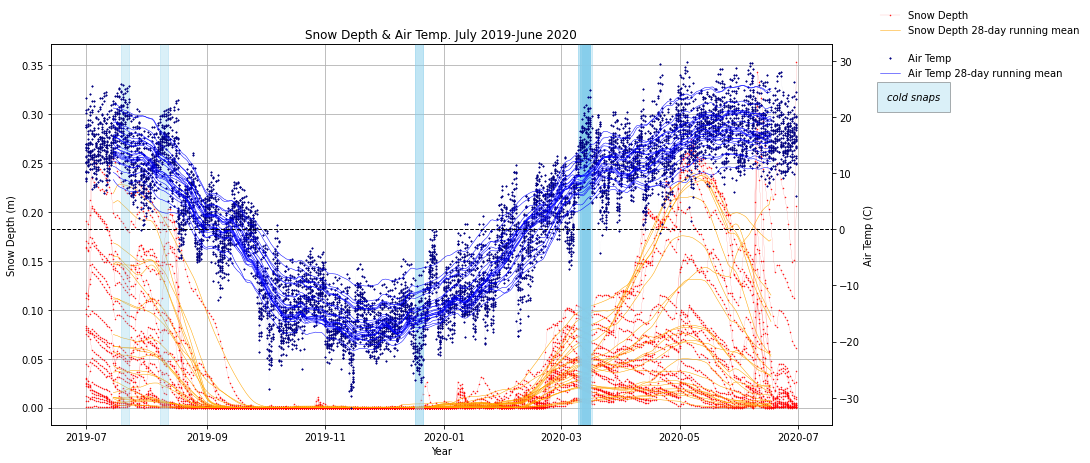

In [145]:
#define subplots
fig, ax = plt.subplots(figsize=(14,7))

#add snow depth to plot
ax.plot(day_mean_W00_01_df1, label='Snow Depth', color='red', linewidth=0.1, marker='o', markersize=0.5)
ax.plot(run_mean_28_df1, label='Snow Depth 28-day running mean', color='orange', linewidth=0.5)

#add legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.05, 1.0), loc='lower left', frameon=False)

#define second y-axis that shares x-axis with current plot
ax2 = ax.twinx()
#add ais temp to plot
ax2.plot(day_mean_W00_01_df2, label='Air Temp', color='navy', linewidth=0.01, marker='*', markersize=1.5)
ax2.plot(run_mean_28_df2, label='Air Temp 28-day running mean', color='blue', linewidth=0.5)
#add second y-axis label
ax2.set_ylabel('Air Temp (C)')
#add line at 0 C
ax2.axhline(0, linestyle = 'dashed', c='black', linewidth = 1)

#add cold snaps
#Arkhangai
ax2.axvspan('2020-03-12', '2020-03-16', color="skyblue", alpha=0.3)

#Bayankhongor
ax2.axvspan('2020-03-12', '2020-03-16', color="skyblue", alpha=0.3)
 
#DarkhanUul
ax2.axvspan('2020-03-11', '2020-03-16', color="skyblue", alpha=0.3)

#Dornogovi
ax2.axvspan('2020-03-13', '2020-03-17', color="skyblue", alpha=0.3)

#Dundgovi
ax2.axvspan('2020-03-12', '2020-03-16', color="skyblue", alpha=0.3)

#Govisumber
ax2.axvspan('2019-12-17', '2019-12-21', color="skyblue", alpha=0.3)
ax2.axvspan('2020-03-12', '2020-03-16', color="skyblue", alpha=0.3)

#Khentii
ax2.axvspan('2019-12-17', '2019-12-21', color="skyblue", alpha=0.3)

#Khuvsgul
ax2.axvspan('2019-08-08', '2019-08-12', color="skyblue", alpha=0.3)
ax2.axvspan('2020-03-10', '2020-03-15', color="skyblue", alpha=0.3)

#Sukhbaatar
ax2.axvspan('2019-07-19', '2019-07-23', color="skyblue", alpha=0.3)

#Tuv
ax2.axvspan('2020-03-11', '2020-03-16', color="skyblue", alpha=0.3)

#Ulaanbaatar
ax2.axvspan('2020-03-11', '2020-03-16', color="skyblue", alpha=0.3)

#Umnugovi
ax2.axvspan('2020-03-12', '2020-03-16', color="skyblue", alpha=0.3)

#Uvs
ax2.axvspan('2020-03-10', '2020-03-15', color="skyblue", alpha=0.3)

#Uvurkhangai
ax2.axvspan('2020-03-12', '2020-03-16', color="skyblue", alpha=0.3)

#Zavkhan
ax2.axvspan('2020-03-11', '2020-03-15', color="skyblue", alpha=0.3)

#add cold snaps legend
text_pos_x = 0.955
text_pos_y = 0.77
ax.text(text_pos_x, text_pos_y, "cold snaps", transform=plt.gcf().transFigure, style='italic',
        bbox={'facecolor': 'skyblue', 'alpha': 0.3, 'pad': 10})

# add title & grid 
ax.set(title='Snow Depth & Air Temp. July 2019-June 2020', xlabel='Year', ylabel='Snow Depth (m)')
ax.grid()

#add legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.05, 1.0), loc='upper left', frameon=False)

#Total Dzuds = 11

---